# Sales and Demand Analysis for Walmart Stores: Exploring Feature Importance and Insights.


# Detailed Problem that Walmart faces 

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

# Shorter and Concise Problem statement


To analyse and predict the demand for 45 Walmart Stories so that it can plan its promotional strategies and markdowns during holiday and non-holiday weeks

# Steps to solve this problem statement of Walmart 


1. Importing and reading data 
2. Data Cleaning 
3. Exploratory Data Analysis (EDA)
4. Feature Engineering 
5. Model Building and Evaluation
6. Feature Importance 
7. Model findings and recommendations 

# Details of columns or features in this dataset 

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:\

- Store - the store number
- Date - the week of sales
- Weekly_Sales - sales for the given store
- Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
- Temperature - Temperature on the day of sale
- Fuel_Price - Cost of fuel in the region
- CPI – Prevailing consumer price index
- Unemployment - Prevailing unemployment rate


--------------------------------------------------------------------------------------------------------------------------------

- Holiday Events\
#### Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\
#### Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\
#### Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\
#### Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

## Step 1: Importing and reading data 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [4]:
walmart =  pd.read_csv("/Users/praneethjakkala/Downloads/Walmart.csv")

walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
walmart.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [6]:
walmart.shape # There are 6435 records and 8 columns/features in this dataset 

(6435, 8)

In [7]:
walmart.columns # The eight columns from this dataset are 'Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       # 'Fuel_Price', 'CPI', 'Unemployment']

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [8]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


## Step 2: Data Cleaning 

In [9]:
# Let's check if this dataset has any missing values 

walmart.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

<Axes: >

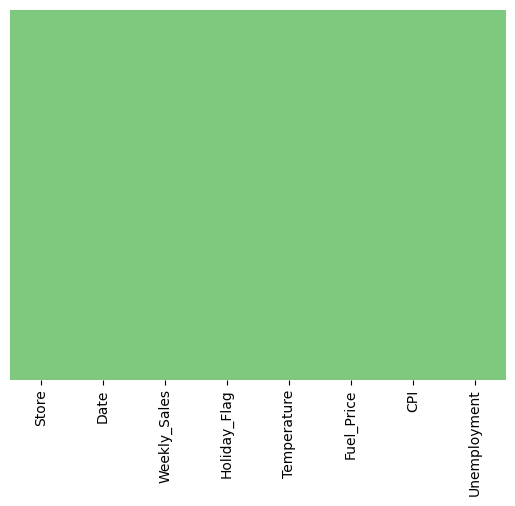

In [10]:
sns.heatmap(walmart.isnull(),  yticklabels=False, cbar=False, cmap = "Accent")

In [11]:
# Let's look at the number of unique values at each column

walmart.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

#### It is clear that none of the columns have any missing values in this dataset
#### So, let's proceed with the Exploratory data analysis

## Step 3 - Exploratory Data Analysis (EDA)

In [12]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [13]:
walmart.Date=pd.to_datetime(walmart.Date)


In [14]:
walmart['day'] = walmart.Date.dt.weekday
walmart['month'] = walmart.Date.dt.month
walmart['year'] = walmart.Date.dt.year

In [15]:
# Let us convert days and months into categorical columns 

days = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5: 'Friday',6:'Saturday'}
walmart['day'] = walmart['day'].map(days)
months={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
walmart['month']= walmart['month'].map(months)

walmart['week'] = walmart['Date'].dt.week

walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,May,2010,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,December,2010,48
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,February,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,February,2010,8
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,May,2010,18


In [16]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   day           6435 non-null   object        
 9   month         6435 non-null   object        
 10  year          6435 non-null   int64         
 11  week          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(4), object(2)
memory usage: 603.4+ KB


In [17]:
walmart.nunique().sort_values()

Holiday_Flag       2
year               3
day                7
month             12
Store             45
week              52
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [18]:
walmart.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,week
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,2010.965035,26.000000
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.797019,14.511794
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,2010.000000,14.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,2011.000000,26.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,2012.000000,38.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,2012.000000,52.000000


In [19]:
# Checking outliers with the help of boxplot 

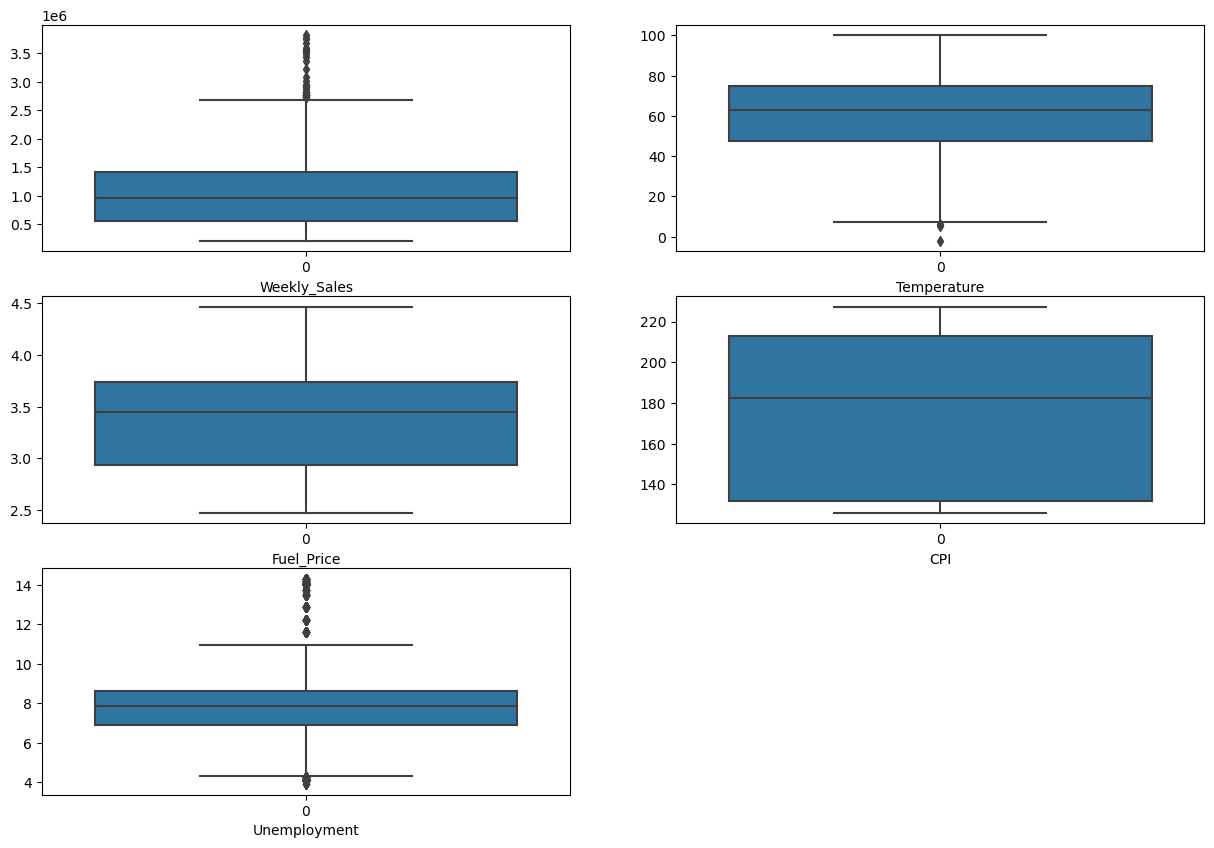

In [20]:
pno = 1
plt.figure(figsize=(15,10))
for i in ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]:
        if pno<=5:
            plt.subplot(3,2,pno);
            pno+=1
            sns.boxplot(walmart[i]);
            plt.xlabel(i);

#### Three columns have outliers. They are Weekly sales, fuel price and unemployment

In [21]:
# Let us treat the outliers now 

def outlier_treatment():
    l = ["Weekly_Sales","Temperature","Unemployment"]
    for i in l:
        x = np.quantile(walmart[i],[0.25,0.75])
        iqr = x[1]-x[0]
        uw = x[1]+1.5*iqr
        lw = x[0]-1.5*iqr
        walmart[i]  = np.where(walmart[i]>uw,uw,(np.where(walmart[i]<lw,lw,walmart[i])))
        
outlier_treatment()

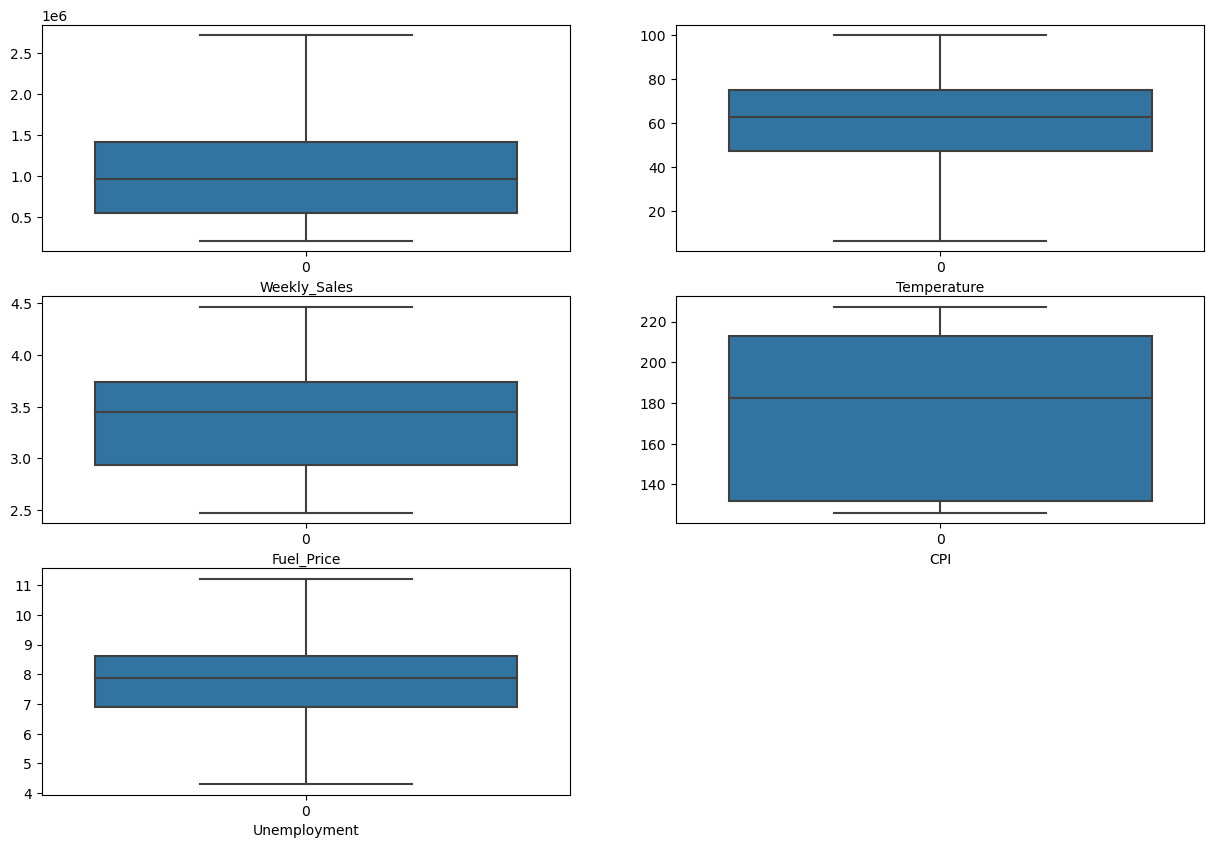

In [22]:
# Now let us again check if the column has any outliers 

pno = 1
plt.figure(figsize=(15,10))
for i in ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]:
        if pno<=5:
            plt.subplot(3,2,pno);
            pno+=1
            sns.boxplot(walmart[i]);
            plt.xlabel(i);

#### Now the outliers have been removed from this table

In [23]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   day           6435 non-null   object        
 9   month         6435 non-null   object        
 10  year          6435 non-null   int64         
 11  week          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(4), object(2)
memory usage: 603.4+ KB


In [24]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,May,2010,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,December,2010,48
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,February,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,February,2010,8
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,May,2010,18


### 1. Were there higher number of transactions happening in holiday weeks or Non-holiday weeks? 

In [25]:
walmart["Holiday_Flag"].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

<Axes: >

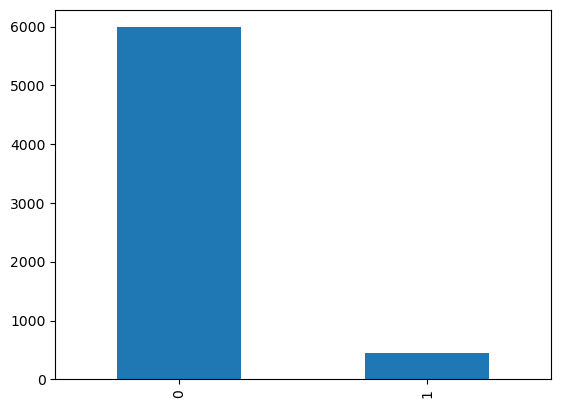

In [26]:
walmart["Holiday_Flag"].value_counts().plot(kind = "bar")

#### There were higher number of non -holiday weeks than the holiday weeks 

### 2. Which year had the most number of transactions? 

In [27]:
walmart["year"].value_counts()

2011    2340
2010    2160
2012    1935
Name: year, dtype: int64

<Axes: >

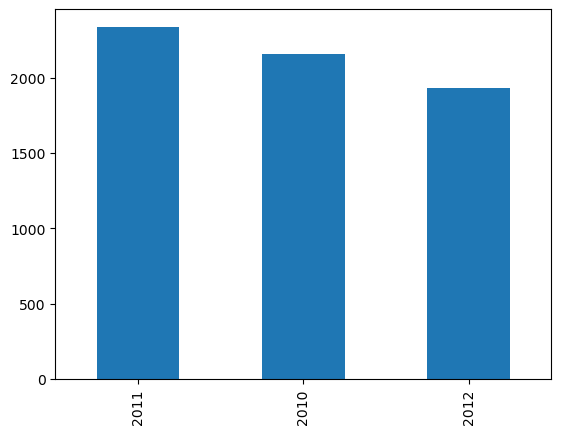

In [28]:
walmart["year"].value_counts().plot(kind = "bar")

#### The year 2011 had the most number of transactions with 2340 and 2012 had the least number of transactions

### 3. Which month had the highest number of transactions? 

In [29]:
walmart["month"].value_counts()

April        630
May          585
September    585
July         585
October      585
March        540
June         540
August       540
December     495
February     495
January      450
November     405
Name: month, dtype: int64

<Axes: >

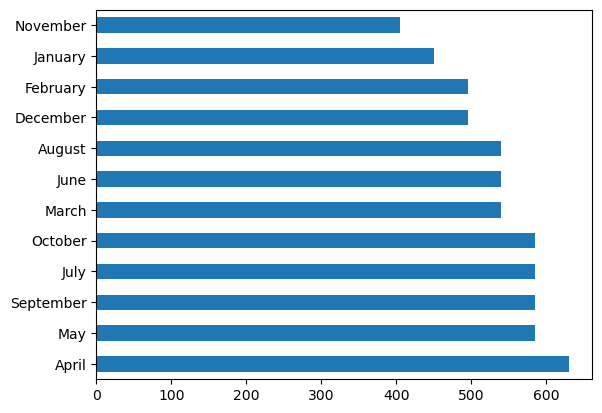

In [30]:
walmart["month"].value_counts().plot(kind = "barh")

#### The month of April had the highest number of transactions among all the walmart stores

### 4. Which day had the highest number of transactions? 

In [31]:
walmart["day"].value_counts()

Thursday     4320
Sunday        495
Wednesday     450
Saturday      405
Monday        405
Friday        270
Tuesday        90
Name: day, dtype: int64

<Axes: >

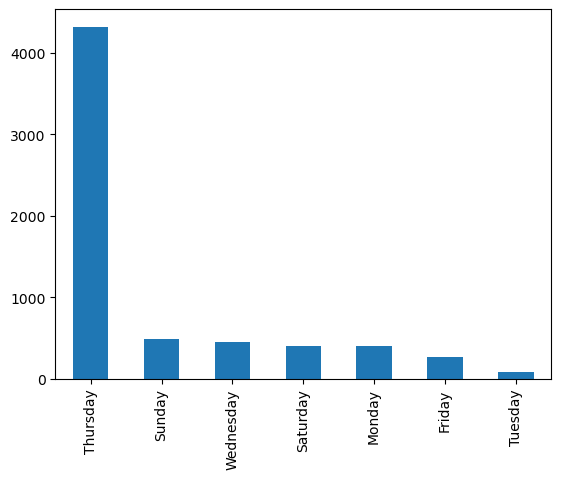

In [32]:
walmart["day"].value_counts().plot(kind = "bar")

#### Thursday had the highest number of transactions compared to any other day in the week

### 5. Which week had the highest number of transactions among the Walmart stores? 

In [33]:
walmart["week"].value_counts()

17    180
41    180
19    180
37    180
28    180
1     180
15    180
42    135
38    135
43    135
50    135
40    135
13    135
10    135
33    135
32    135
23    135
30    135
29    135
34    135
36    135
7     135
24    135
44    135
21    135
8     135
20    135
16    135
25    135
5     135
12    135
11    135
3      90
4      90
22     90
31     90
26     90
9      90
6      90
39     90
2      90
46     90
52     90
51     90
47     90
49     90
18     90
35     90
27     90
48     90
14     90
45     90
Name: week, dtype: int64

<Figure size 3000x3000 with 0 Axes>

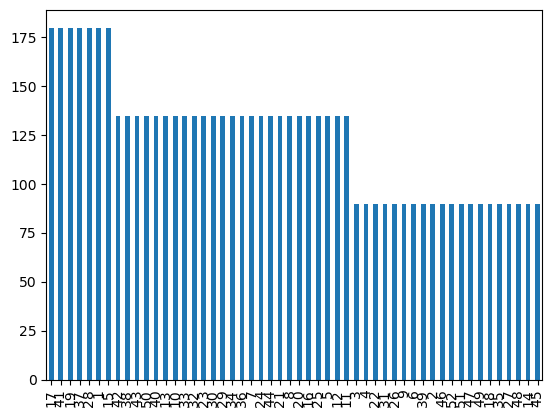

<Figure size 3000x3000 with 0 Axes>

In [34]:
walmart["week"].value_counts().plot(kind = "bar")

plt.figure(figsize = (30,30))

#### The 17th, 41st, 19th, 37th, 28th, 1st and 15th - All these weeks had the highest number of transactions (190)

#### All these weeks had the lowest number of transactions (90)

- 4th week     
- 22nd week   
- 31st week     
- 26th week  
- 9th week      
- 6th week      
- 39th week      
- 2nd week      
- 46th week      
- 52th week      
- 51st week      
- 47th week      
- 49th week    
- 18th week      
- 35th week      
- 27th week      
- 48th week      
- 14th week     
- 45th week      

### 6. Which store had the highest number of transactions among the walmart stores?

In [35]:
walmart["Store"].value_counts()

1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: Store, dtype: int64

<Axes: >

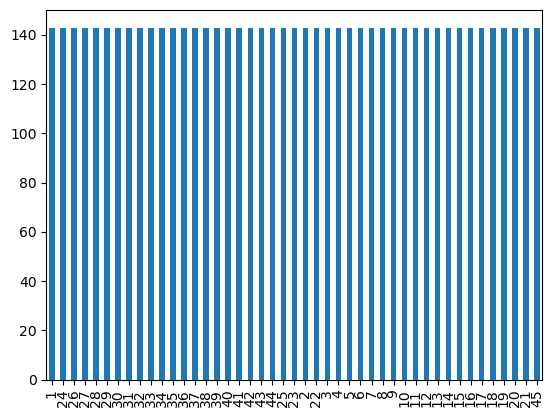

In [36]:
walmart["Store"].value_counts().plot(kind = "bar")

#### All 45 stores had an equal number of transactions occuring in them 143. 

### 7. Which year had the highest sales? 

In [37]:
walmart.groupby("year")["Weekly_Sales"].sum().sort_values(ascending = False)

year
2011    2.442656e+09
2010    2.281974e+09
2012    2.000133e+09
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='year'>

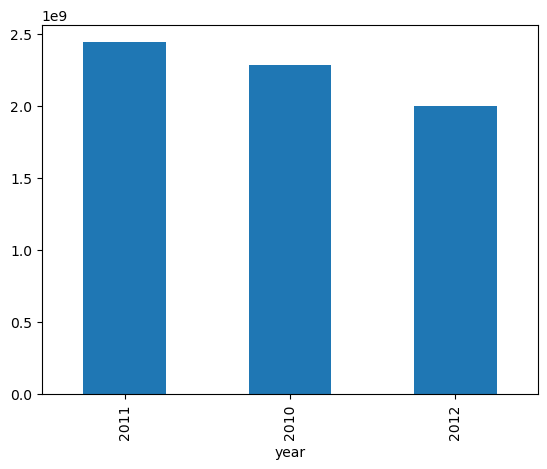

In [38]:
walmart.groupby("year")["Weekly_Sales"].sum().sort_values(ascending = False).plot(kind = "bar")

Text(0.5, 1.0, 'Annual Sales')

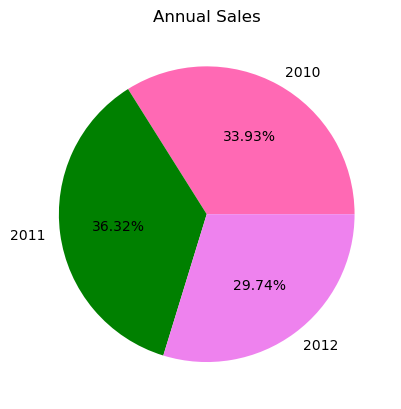

In [39]:
plt.pie(walmart.groupby('year')['Weekly_Sales'].sum(),labels=walmart['year'].unique(),
        normalize=True,autopct='%1.2f%%',colors=['hotpink','green','violet'])
plt.title('Annual Sales')

#### The year 2011 had the highest Sales of 2.44 billion US dollars compared to 2010 with 2.28 US billion dollars and 2012 with 2 billion US dollars

#### Similarly, 2011 contributes to highest sales at 36.32% that is a tad bit higher than 2010 sales that's 33.93%

### 8. Which month had the highest Sales in all the years of 2010, 2011, and 2012? 

In [40]:
walmart.groupby("month")["Weekly_Sales"].sum().sort_values(ascending = False)

month
April        6.453239e+08
May          6.056966e+08
October      6.028871e+08
July         5.933139e+08
September    5.905323e+08
December     5.881230e+08
June         5.750180e+08
August       5.642317e+08
March        5.534864e+08
February     5.220257e+08
November     4.576982e+08
January      4.264263e+08
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='month'>

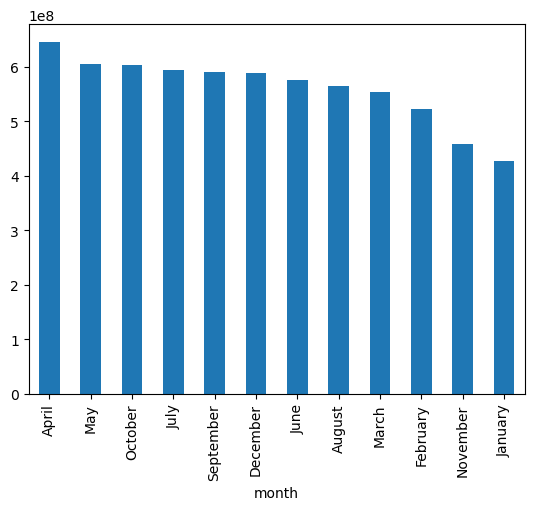

In [41]:
walmart.groupby("month")["Weekly_Sales"].sum().sort_values(ascending = False).plot(kind = "bar")

In [42]:
df3 = walmart.groupby('month')['Weekly_Sales'].sum().reset_index()

df3

,month,Weekly_Sales
0,April,6.453239e+08
1,August,5.642317e+08
2,December,5.881230e+08
3,February,5.220257e+08
4,January,4.264263e+08
5,July,5.933139e+08
6,June,5.750180e+08
7,March,5.534864e+08
8,May,6.056966e+08
9,November,4.576982e+08


([<matplotlib.patches.Wedge at 0x16483e850>,
 [Text(0.572939814261659, 0.17815714757992632, 'April'),
  Text(0.388480365468709, 0.45725595200642083, 'August'),
  Text(0.09909191344232197, 0.5917607562945851, 'December'),
  Text(-0.20726670105473471, 0.5630635085262472, 'February'),
  Text(-0.428653583812137, 0.41982866158113985, 'January'),
  Text(-0.5734481719803087, 0.1765140052586258, 'July'),
  Text(-0.5817609377101057, -0.14681352578920787, 'June'),
  Text(-0.4289044149041403, -0.4195724048072479, 'March'),
  Text(-0.1512678710128148, -0.5806186624620763, 'May'),
  Text(0.14374059406069353, -0.582527803301335, 'November'),
  Text(0.4034157455351736, -0.44413481765596813, 'October'),
  Text(0.5773119515122125, -0.16343472899344494, 'September')],
 [Text(1.193624613045123, 0.3711607241248465, '9.60%'),
  Text(0.8093340947264771, 0.9526165666800435, '8.39%'),
  Text(0.2064414863381708, 1.2328349089470523, '8.75%'),
  Text(-0.43180562719736404, 1.1730489760963483, '7.76%'),
  Text(-0.

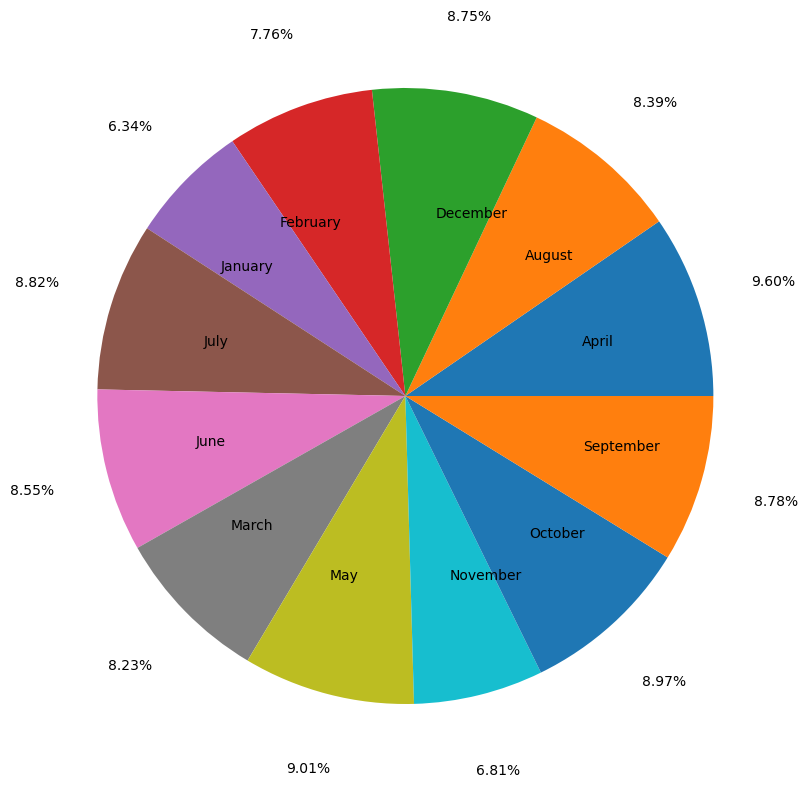

In [43]:
plt.figure(figsize=(10,10))
plt.pie(df3['Weekly_Sales'],labels=df3['month'],normalize=True,autopct='%1.2f%%', pctdistance=1.25, labeldistance=.6)

#### Among all the three years, the month of April had the highest Sales for Walmart with 645 million US dollars

#### April has 9.6 percent Sales compared to other months which is the highest among all month sales



### 9. Which day among all the years had the highest sales for Walmart? 

In [44]:
walmart.groupby("day")["Weekly_Sales"].sum().sort_values(ascending = False)


day
Thursday     4.473833e+09
Sunday       5.390133e+08
Wednesday    4.766244e+08
Monday       4.334757e+08
Saturday     4.266091e+08
Friday       2.824947e+08
Tuesday      9.271282e+07
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='day'>

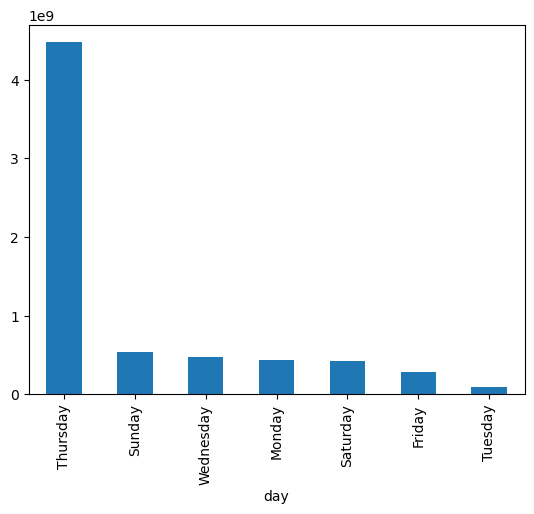

In [45]:
walmart.groupby("day")["Weekly_Sales"].sum().sort_values(ascending = False).plot(kind = "bar")

In [46]:
df2 = walmart.groupby("day")["Weekly_Sales"].sum().reset_index()

df2

,day,Weekly_Sales
0,Friday,2.824947e+08
1,Monday,4.334757e+08
2,Saturday,4.266091e+08
3,Sunday,5.390133e+08
4,Thursday,4.473833e+09
5,Tuesday,9.271282e+07
6,Wednesday,4.766244e+08


([<matplotlib.patches.Wedge at 0x164972ad0>,
 [Text(0.5947825636806602, 0.07895379624477487, 'Friday'),
  Text(0.535902057933369, 0.2698313997717463, 'Monday'),
  Text(0.3876957790851648, 0.45792137194014765, 'Saturday'),
  Text(0.14927592972485482, 0.5811339749186759, 'Sunday'),
  Text(-0.5208077768783068, -0.2979249226618609, 'Thursday'),
  Text(0.5297833452901384, -0.28165512076507676, 'Tuesday'),
  Text(0.5851876117342988, -0.1324970153350921, 'Wednesday')],
 [Text(1.2391303410013754, 0.16448707550994768, '4.20%'),
  Text(1.1164626206945187, 0.5621487495244716, '6.45%'),
  Text(0.80769953976076, 0.9540028582086411, '6.34%'),
  Text(0.31099152026011423, 1.2106957810805747, '8.02%'),
  Text(-1.0850162018298057, -0.6206769222122102, '66.53%'),
  Text(1.1037153026877884, -0.58678150159391, '1.38%'),
  Text(1.219140857779789, -0.2760354486147752, '7.09%')])

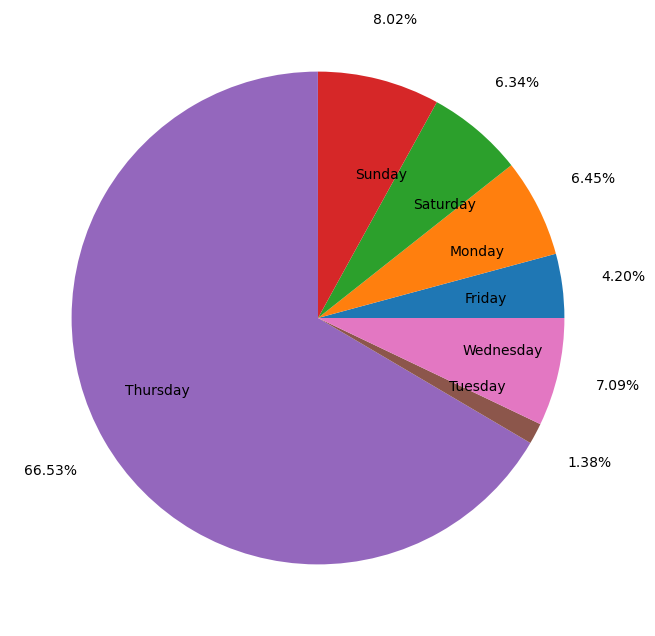

In [47]:
plt.figure(figsize=(10,8))
plt.pie(df2['Weekly_Sales'],labels= df2['day'],autopct='%1.2f%%', normalize=True, pctdistance=1.25, labeldistance=.6)

#### Thursday had the highest sales in a week among all years in Walmart with 4.47 billion. This is much higher sales from all 45 stores compared to other days. Also, Thursday has 66.53% of sales, that's highest compared to any day in the week

### 10. Which week had the highest sales? Holiday week or the non-holiday week? 

In [48]:
walmart.groupby("Holiday_Flag")["Weekly_Sales"].sum().sort_values(ascending = False)

Holiday_Flag
0    6.220935e+09
1    5.038284e+08
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Holiday_Flag'>

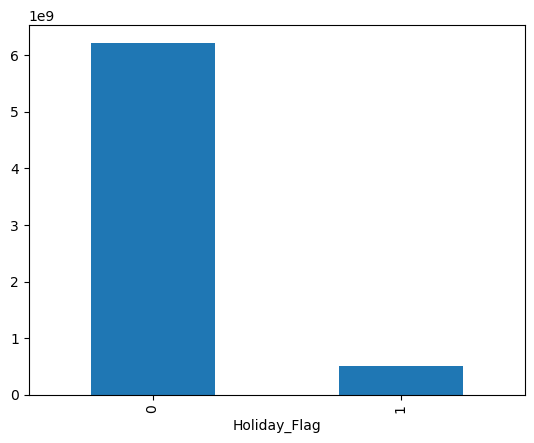

In [49]:
walmart.groupby("Holiday_Flag")["Weekly_Sales"].sum().sort_values(ascending = False).plot(kind = "bar")

([<matplotlib.patches.Wedge at 0x164a5c7d0>,
 [Text(-0.2565256729373791, -1.0696703132853715, 'Non Special Holiday Week'),
  Text(0.32648725196795214, 1.3613985729030331, 'Special Holiday Week')],
 [Text(-0.1399230943294795, -0.5834565345192936, '92.51%'),
  Text(0.2098846619793978, 0.8751847968662354, '7.49%')])

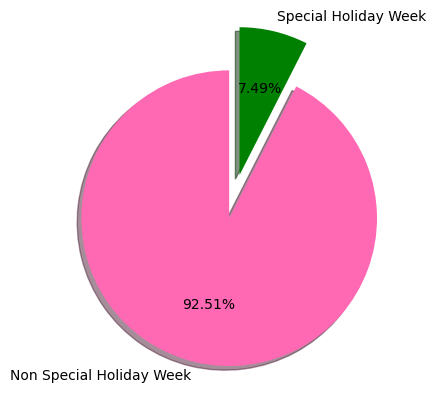

In [50]:
df4 = walmart.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()
plt.pie(df4['Weekly_Sales'],labels= ['Non Special Holiday Week','Special Holiday Week'],
        normalize=True,autopct='%1.2f%%',startangle=90,explode=[0,0.3],shadow=True,colors=['hotpink','green'])

#### Non holiday weeks had the highest sales of Walmart compared to holiday sales with 6.220 billion US dollars

#### Holiday weeks had the lower sales compared to non-holiday sales with 503 million US dollars

#### Similarly, non-holiday week contribute to 92.51% of Walmart sales compated to 7.49% of its special holiday week sales

### 11. Which Store has the highest and lowest sales among Walmart? 

In [51]:
walmart.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending = False)

Store
20    2.990663e+08
4     2.973575e+08
14    2.870091e+08
13    2.845247e+08
2     2.741628e+08
10    2.692807e+08
27    2.534795e+08
6     2.237489e+08
1     2.224028e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
23    1.987367e+08
24    1.940160e+08
11    1.939628e+08
28    1.892637e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
12    1.442872e+08
26    1.434164e+08
34    1.382498e+08
40    1.378703e+08
35    1.315207e+08
8     1.299512e+08
17    1.277821e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
43    9.056544e+07
15    8.913368e+07
7     8.159828e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
38    5.515963e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
Name: Weekly_Sales, dtype: float64

<Figure size 4000x1400 with 0 Axes>

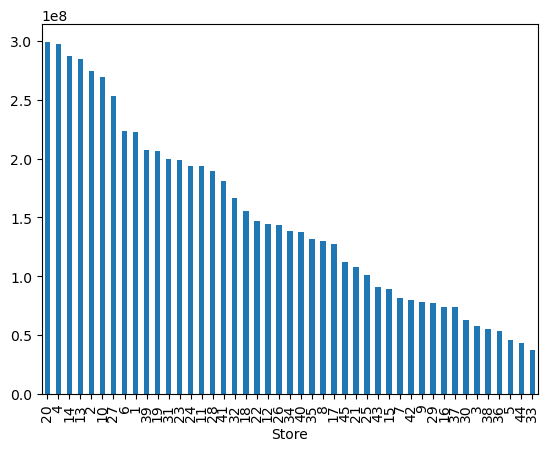

<Figure size 4000x1400 with 0 Axes>

In [52]:
walmart.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending = False).plot(kind = "bar")

plt.figure(figsize=(40, 14))

#### The Store 20 is showing the highest sales among the 45 walmart stores with 299 million US dollars

#### The Store 4 is closer to Store 20 in its sales with 297 million US dollars

#### The Store 33 performed least in sales with 37 million US dollars

### 12. Which store performed well and performed least during the holiday week? 

In [53]:
holiday_sales = walmart[walmart["Holiday_Flag"] ==1]

holiday_sales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,week
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,December,2010,48
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787,Friday,October,2010,40
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,Thursday,November,2010,47
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,Thursday,December,2010,52
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,Tuesday,November,2011,44
...,...,...,...,...,...,...,...,...,...,...,...,...
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625,Thursday,September,2011,36
6386,45,2011-11-25,1170672.94,1,48.71,3.492,188.350400,8.523,Thursday,November,2011,47
6391,45,2011-12-30,869403.63,1,37.79,3.389,189.062016,8.523,Thursday,December,2011,52
6397,45,2012-10-02,803657.12,1,37.00,3.640,189.707605,8.424,Monday,October,2012,40


In [54]:
holiday_sales.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending = False)

Store
20    2.221323e+07
4     2.207760e+07
14    2.100449e+07
13    2.094061e+07
2     2.079267e+07
10    2.068816e+07
27    1.892299e+07
6     1.680908e+07
1     1.665748e+07
19    1.577047e+07
39    1.551127e+07
31    1.500026e+07
28    1.478245e+07
24    1.475098e+07
23    1.462542e+07
11    1.448394e+07
41    1.334948e+07
32    1.203784e+07
18    1.169422e+07
12    1.138140e+07
22    1.084875e+07
35    1.074348e+07
26    1.072047e+07
34    1.041978e+07
40    1.008034e+07
17    9.797970e+06
8     9.753309e+06
45    8.362937e+06
21    8.264913e+06
25    7.396768e+06
15    7.064060e+06
7     6.724003e+06
43    6.359463e+06
29    6.069579e+06
9     5.889508e+06
42    5.676942e+06
16    5.667336e+06
37    5.075250e+06
3     4.378110e+06
30    4.368593e+06
38    3.815099e+06
36    3.676406e+06
5     3.595016e+06
44    2.960356e+06
33    2.625945e+06
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Store'>

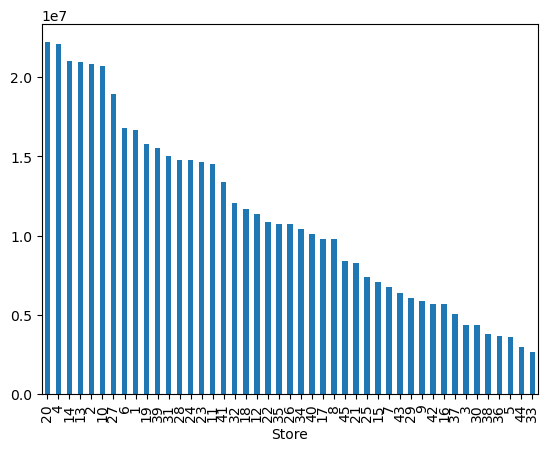

In [55]:
holiday_sales.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending = False).plot(kind = "bar")

#### Store 20 showed the peak sales performance during the holiday weeks among walmart stores with 22.2 million US dollars

#### Store 33 performed the worst among all stores with 2.6 million US dollars

### 13. Which store performed well and performed least during the non-holiday week among the walmart stores? 

In [56]:
non_holiday_sales = walmart[walmart["Holiday_Flag"]==0]

In [57]:
non_holiday_sales.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending = False)

Store
20    2.768531e+08
4     2.752799e+08
14    2.660046e+08
13    2.635841e+08
2     2.533701e+08
10    2.485926e+08
27    2.345565e+08
6     2.069398e+08
1     2.057453e+08
39    1.919343e+08
19    1.908644e+08
31    1.846136e+08
23    1.841113e+08
11    1.794788e+08
24    1.792650e+08
28    1.744812e+08
41    1.679925e+08
32    1.547814e+08
18    1.434205e+08
22    1.362269e+08
12    1.329058e+08
26    1.326959e+08
34    1.278300e+08
40    1.277900e+08
35    1.207772e+08
8     1.201979e+08
17    1.179842e+08
45    1.040324e+08
21    9.985297e+07
25    9.366441e+07
43    8.420597e+07
15    8.206962e+07
7     7.487427e+07
42    7.388881e+07
9     7.189971e+07
29    7.107198e+07
37    6.912749e+07
16    6.858509e+07
30    5.834829e+07
3     5.320862e+07
38    5.134453e+07
36    4.973581e+07
5     4.188067e+07
44    4.033273e+07
33    3.453428e+07
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Store'>

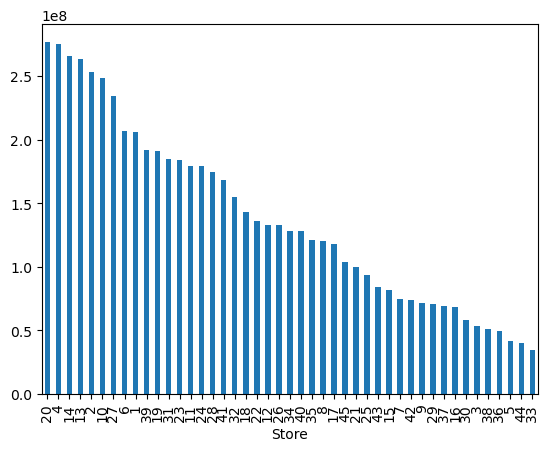

In [58]:
non_holiday_sales.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending = False).plot(kind = "bar")

#### Store 20 has the highest sales even during the non-holiday weeks with 276 million US dollars

#### Store 4 has the second highest sales that's closer to Store 20 sales with 275 million US dollars

#### Store 33 has the lowest non-holiday week sales with 34 million US dollars

### 14. Which week had the highest and least sales for Walmart? 

In [59]:
walmart.groupby(["week"])["Weekly_Sales"].sum().sort_values(ascending= False)

week
41    1.905628e+08
37    1.866619e+08
28    1.861896e+08
15    1.854418e+08
19    1.841248e+08
1     1.815590e+08
17    1.807027e+08
50    1.675980e+08
23    1.529603e+08
51    1.474136e+08
7     1.471902e+08
5     1.462024e+08
10    1.445892e+08
24    1.434817e+08
40    1.433135e+08
36    1.421432e+08
33    1.413328e+08
32    1.412186e+08
21    1.409434e+08
34    1.407740e+08
25    1.401614e+08
44    1.397901e+08
16    1.384837e+08
13    1.384066e+08
11    1.367628e+08
29    1.362228e+08
20    1.359906e+08
43    1.350028e+08
42    1.340080e+08
8     1.338659e+08
30    1.324108e+08
12    1.320040e+08
47    1.309435e+08
38    1.284312e+08
14    9.731274e+07
27    9.571493e+07
45    9.540010e+07
18    9.488694e+07
9     9.485760e+07
6     9.476718e+07
35    9.452493e+07
48    9.426207e+07
31    9.374673e+07
49    9.237437e+07
22    9.181738e+07
46    9.156456e+07
26    8.937290e+07
52    8.647498e+07
39    8.593073e+07
3     8.273564e+07
2     8.269676e+07
4     7.943483e+07
Name: W

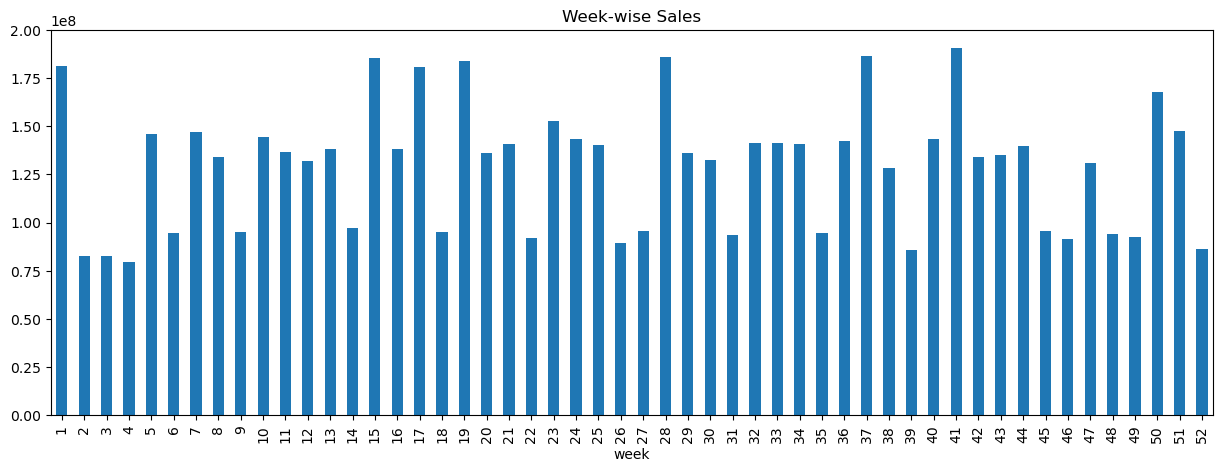

In [60]:
plt.figure(figsize=(15,5))

walmart.groupby(['week'])['Weekly_Sales'].sum().plot(kind='bar')
plt.title('Week-wise Sales')

plt.show()

#### 41st week had the highest weekly sales for Walmart and stands at 190 million US dollars. They fall in the first or second week of October like after October 7th. And 4th week in a year has the least sales for Walmart. 

### 15. How is the yearly sales of Walmart and what is its trend? 

In [61]:
df5 = walmart.copy()

<Figure size 1500x1200 with 0 Axes>

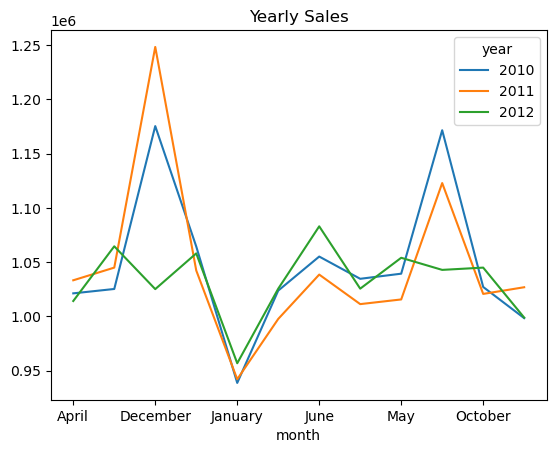

In [62]:
plt.figure(figsize=(15,12))
monthly_sales = pd.pivot_table(df5, index = "month", columns = "year", values = "Weekly_Sales")
monthly_sales.plot()
plt.title('Yearly Sales')
plt.show()

#### From this line chart, it's evident that the sales peaks up during June, december, and September and falls during the month of January



### 16. Is there a correlation between Consumer Price Index and Sales? 

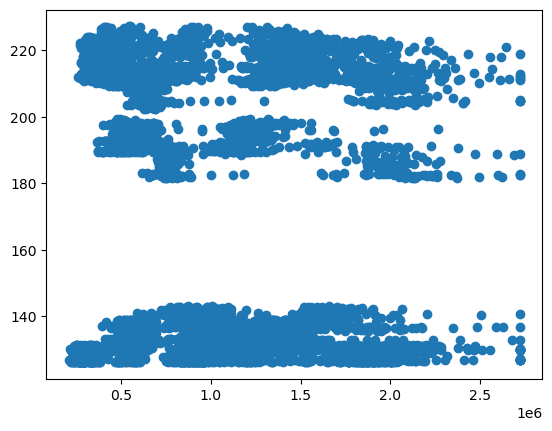

In [63]:
plt.scatter(x = walmart["Weekly_Sales"], y = walmart["CPI"])

plt.show()

#### We couldn't find any significant correlation between Consumer Price Index and Weekly Sales

In [64]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,May,2010,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,December,2010,48
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,February,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,February,2010,8
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,May,2010,18


### 17. Is there a significant correlation between the Fuel Price and Weekly Sales?

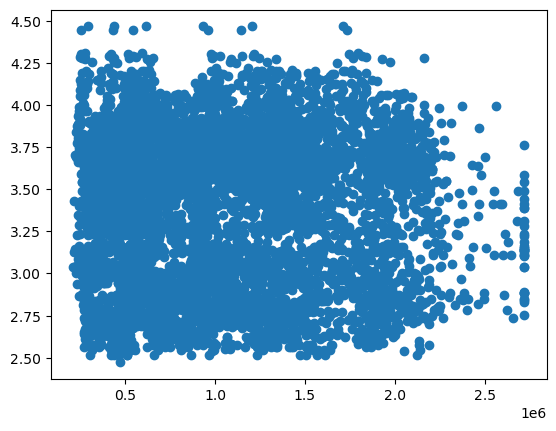

In [65]:
plt.scatter(x = walmart["Weekly_Sales"], y = walmart["Fuel_Price"])

plt.show()

#### There is no significant correlation between fuel price and weekly sales 

### 18. Is there a significant correlation between Unemployment and Weekly Sales?

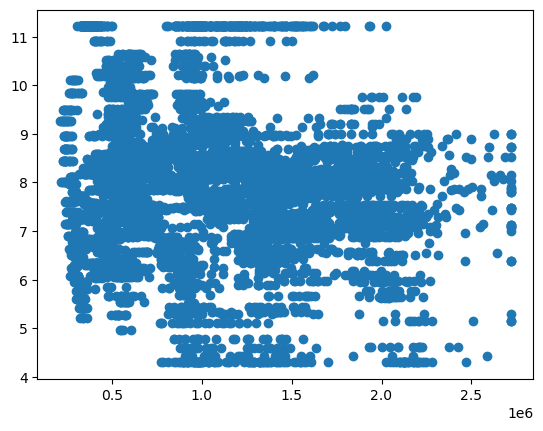

In [66]:
plt.scatter(x = walmart["Weekly_Sales"], y = walmart["Unemployment"])

plt.show()

#### There is no significant correlation between unemployment and weekly sales 

### 19. Is there a significant correlation between CPI and Unemployment? 

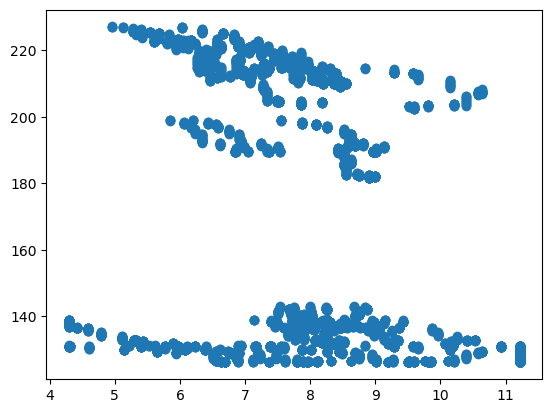

In [67]:
plt.scatter(x = walmart["Unemployment"], y = walmart["CPI"])

plt.show()

#### There is no significant correlation between unemplyoment and CPI

### 20. Is there a significant correlation between CPI and fuel price?

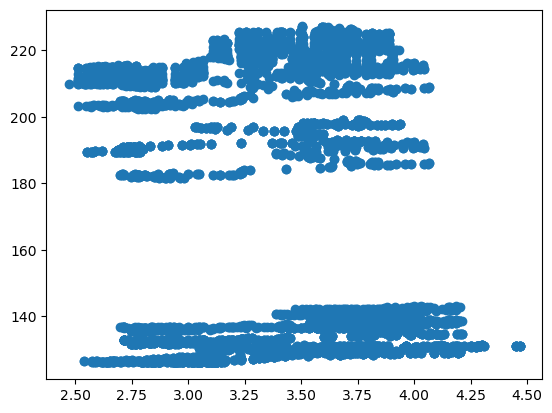

In [68]:
plt.scatter(x = walmart["Fuel_Price"], y = walmart["CPI"])

plt.show()

#### There is no significant correlation between CPI and fuel price 

### 21. Is there a significant correlation between unemployment and fuel price ?

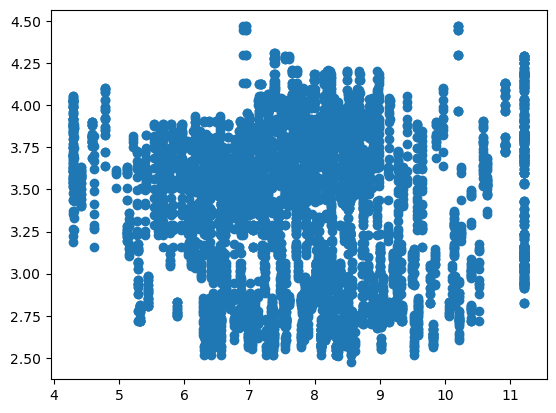

In [69]:
plt.scatter(x = walmart["Unemployment"], y = walmart["Fuel_Price"])

plt.show()

#### There is no significant correlation between unemployment and fuel price

### 22. What is the correlation between all numerical elements ?

In [70]:
walmart.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,week
Store,1.000000e+00,-0.336559,-4.735625e-16,-0.022749,0.060023,-0.209492,0.255964,3.474332e-12,1.053862e-15
Weekly_Sales,-3.365589e-01,1.000000,3.670284e-02,-0.060808,0.010998,-0.072627,-0.108662,-1.634436e-02,6.108660e-02
Holiday_Flag,-4.735625e-16,0.036703,1.000000e+00,-0.155149,-0.078347,-0.002162,0.011204,-5.678257e-02,3.288032e-01
Temperature,-2.274937e-02,-0.060808,-1.551494e-01,1.000000,0.144962,0.176960,0.088315,6.428798e-02,7.313296e-02
Fuel_Price,6.002295e-02,0.010998,-7.834652e-02,0.144962,1.000000,-0.170642,-0.053428,7.794703e-01,-4.193804e-02
CPI,-2.094919e-01,-0.072627,-2.162091e-03,0.176960,-0.170642,1.000000,-0.278542,7.479573e-02,2.782979e-03
Unemployment,2.559643e-01,-0.108662,1.120376e-02,0.088315,-0.053428,-0.278542,1.000000,-2.526376e-01,-6.786673e-03
year,3.474332e-12,-0.016344,-5.678257e-02,0.064288,0.779470,0.074796,-0.252638,1.000000e+00,-1.269874e-01
week,1.053862e-15,0.061087,3.288032e-01,0.073133,-0.041938,0.002783,-0.006787,-1.269874e-01,1.000000e+00


<Axes: >

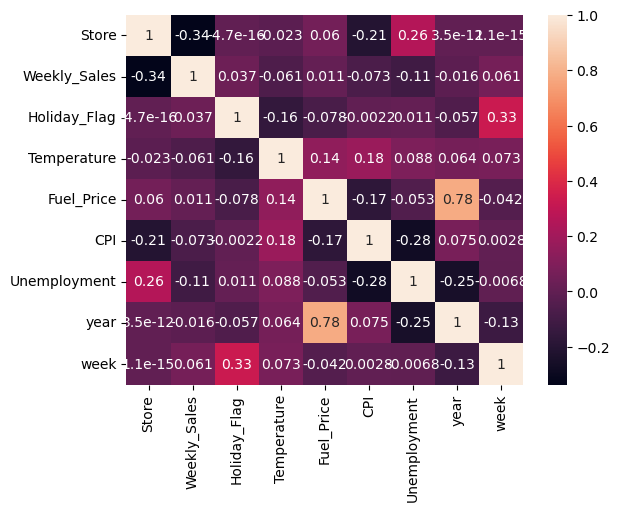

In [71]:
sns.heatmap(walmart.corr(), annot=True)

#### Some findings from the Correlation of different variables 

1. We can see that store and unemployment have some amount of correlation of 0.26
2. Temperature and fuel price have only 0.14 correlation 
3. Whereas, temperature and CPI has a lesser correlation of 0.18
4. So, there is lesser possibility of multicollinearity from this above correlation 
5. We don't take the year and fuel price into concern as year is a constant variable with only three unique values

### 23. How are numerical columns distributed in this dataset?

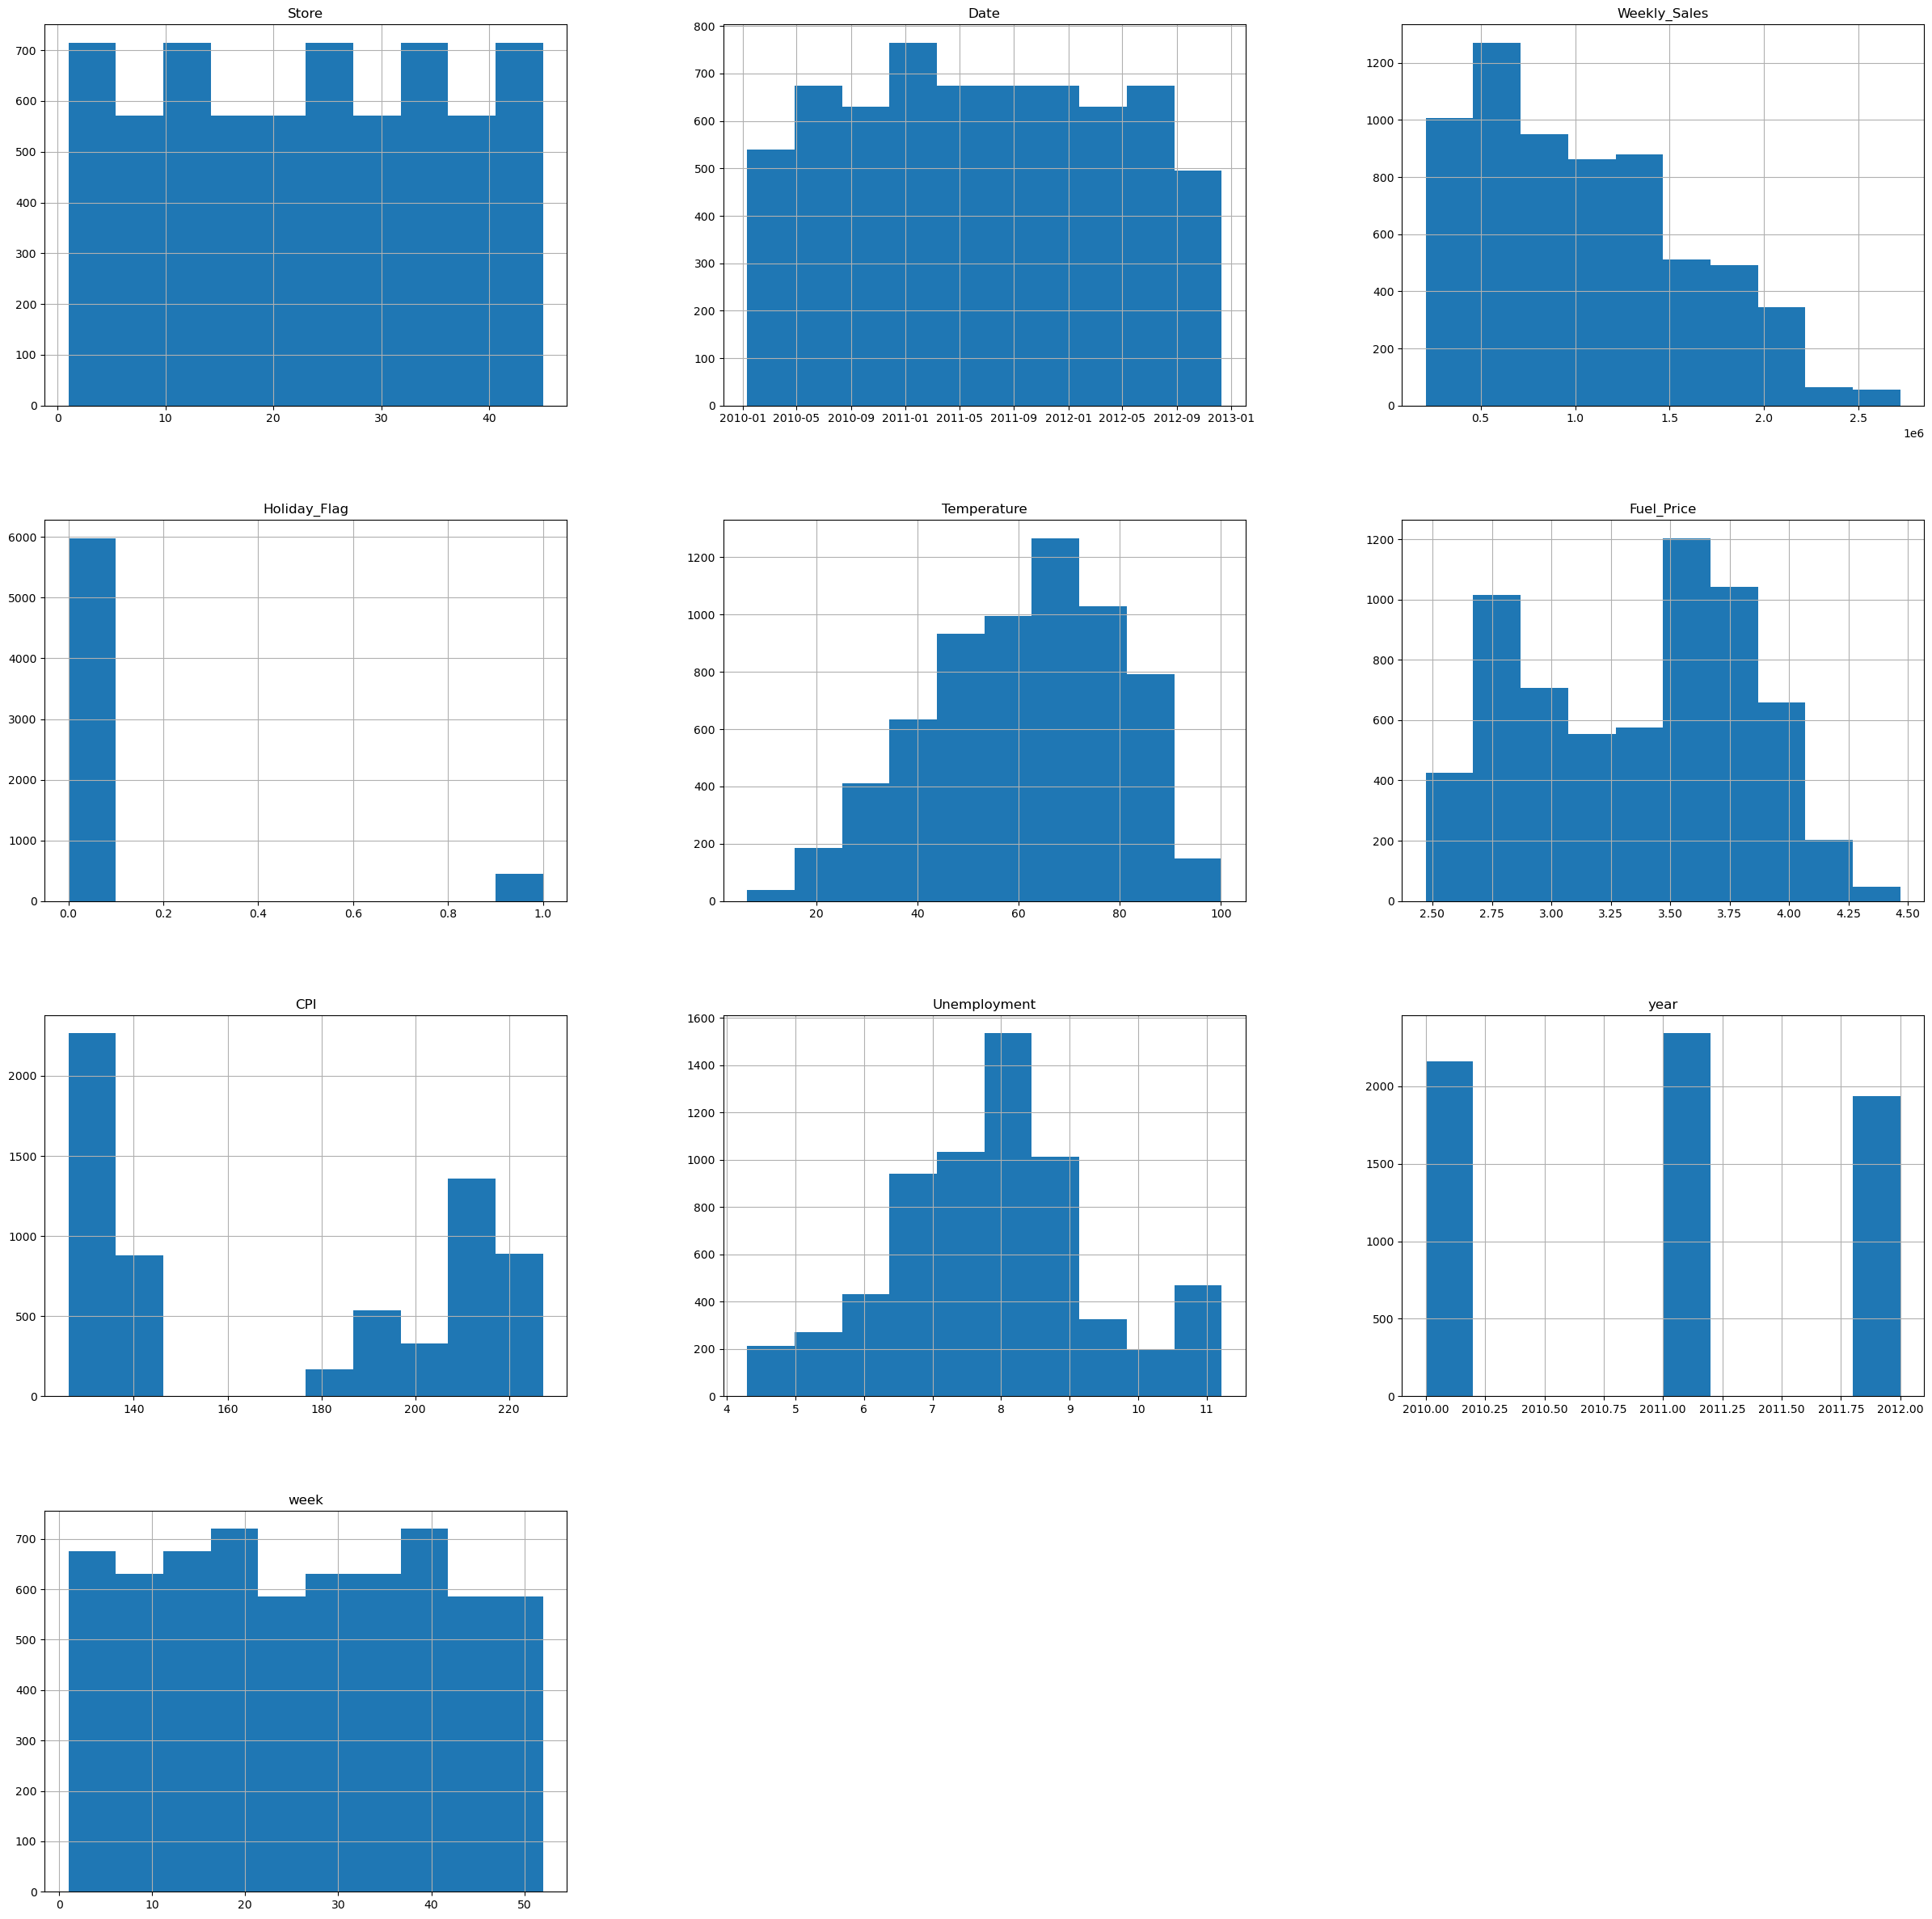

In [72]:
walmart.hist(figsize = (30,30))
plt.show()

<Axes: xlabel='Weekly_Sales', ylabel='Density'>

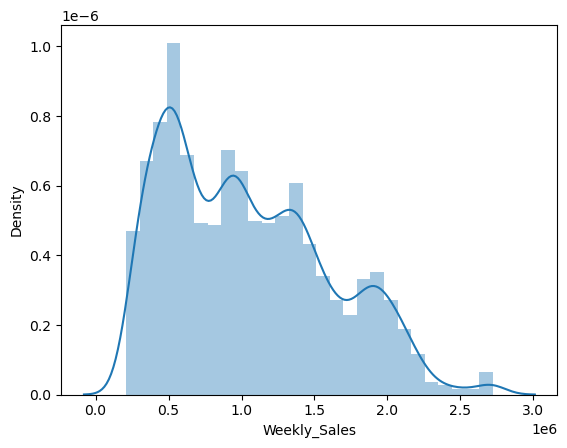

In [73]:
### Weekly Sales distribution 

sns.distplot(walmart['Weekly_Sales'],kde=True)

In [74]:
### Fuel Price and its Distribution 

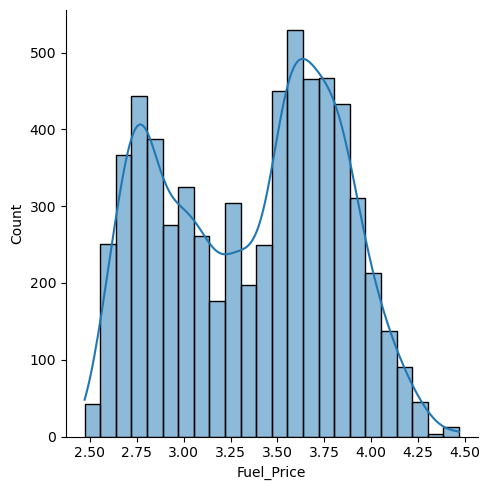

In [75]:
sns.displot(walmart['Fuel_Price'],kde=True)

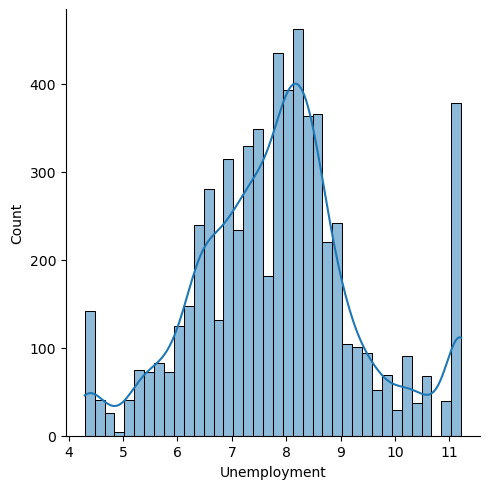

In [76]:
sns.displot(walmart['Unemployment'],kde=True)

<Axes: xlabel='CPI', ylabel='Density'>

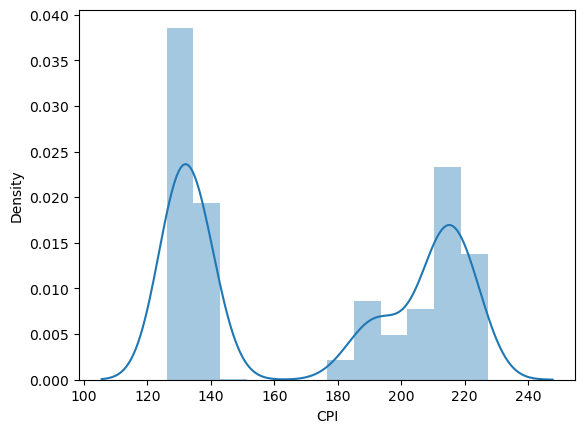

In [77]:
sns.distplot(walmart['CPI'],kde=True)

In [78]:
walmart["Weekly_Sales"].mean()

1045029.2189176378

In [79]:
walmart["Weekly_Sales"].median()

960746.04

#### What did I find from these histograms? 

1. The distribution of Weekly Sales is right skewed This is because, the mean of Weekly sales (1045029.21) is greater than its median (960746.04)

2. The fuel price has bimodal dsitrbution which means it has two peaks in it

3. The temperature is almost normally distributed 

4. Also, Unemployment is almost normally distributed 

5. There are two clusters for Consumer Price Index that is CPI

6. The number of transactions that occured among the stores has almost been equal along these years

### 24. Which store had the highest and least sales in 2010? 

In [80]:
walmart2010 = walmart[walmart.year==2010]
walmart2010

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,May,2010,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,December,2010,48
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,February,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,February,2010,8
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,May,2010,18
...,...,...,...,...,...,...,...,...,...,...,...,...
6335,45,2010-03-12,879244.90,0,40.93,3.046,182.667615,8.724,Thursday,March,2010,10
6336,45,2010-10-12,1002364.34,0,30.54,3.109,182.551954,8.724,Monday,October,2010,41
6337,45,2010-12-17,1123282.85,0,30.51,3.140,182.517732,8.724,Thursday,December,2010,50
6338,45,2010-12-24,1682862.03,0,30.59,3.141,182.544590,8.724,Thursday,December,2010,51


In [81]:
walmart2010.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending = False)

Store
14    1.041201e+08
20    1.004649e+08
4     9.478535e+07
2     9.456223e+07
13    9.429990e+07
10    9.313267e+07
27    8.965539e+07
6     7.690512e+07
1     7.327883e+07
19    7.258053e+07
23    6.769520e+07
24    6.689065e+07
39    6.578228e+07
31    6.556027e+07
11    6.525514e+07
28    6.477876e+07
41    5.773822e+07
18    5.597842e+07
32    5.519094e+07
35    5.219597e+07
22    5.086528e+07
26    4.839070e+07
12    4.837038e+07
40    4.635736e+07
34    4.615042e+07
8     4.320447e+07
17    4.110492e+07
45    3.853634e+07
21    3.763111e+07
25    3.513627e+07
15    3.202353e+07
43    3.153701e+07
29    2.694683e+07
7     2.556808e+07
42    2.549809e+07
9     2.512922e+07
16    2.472863e+07
37    2.450847e+07
30    2.173909e+07
36    2.115313e+07
3     1.874542e+07
38    1.658779e+07
5     1.483603e+07
44    1.360752e+07
33    1.276683e+07
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Store'>

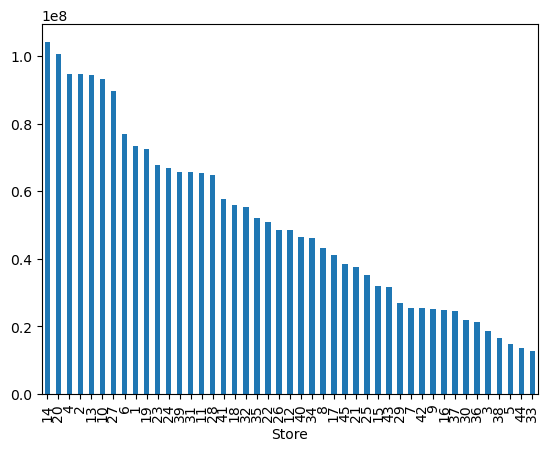

In [82]:
walmart2010.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending = False).plot(kind = "bar")

#### Store 14 had the highest sales in the year 2010 with 104 million US dollars


#### Store 33 had the least sales in the year 2010 with 12.7 million US dollars

### 25. Which store had the highest and least sales in 2011?

In [83]:
walmart2011 = walmart[walmart.year==2011]
walmart2011

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,week
48,1,2011-07-01,1444732.28,0,48.27,2.976,211.404742,7.742,Thursday,July,2011,26
49,1,2011-01-14,1391013.96,0,35.40,2.983,211.457411,7.742,Thursday,January,2011,2
50,1,2011-01-21,1327405.42,0,44.04,3.016,211.827234,7.742,Thursday,January,2011,3
51,1,2011-01-28,1316899.31,0,43.83,3.010,212.197058,7.742,Thursday,January,2011,4
52,1,2011-04-02,1606629.58,0,42.27,2.989,212.566881,7.742,Friday,April,2011,13
...,...,...,...,...,...,...,...,...,...,...,...,...
6387,45,2011-02-12,875699.81,0,50.19,3.452,188.502435,8.523,Friday,February,2011,6
6388,45,2011-09-12,957155.31,0,46.57,3.415,188.654469,8.523,Sunday,September,2011,37
6389,45,2011-12-16,1078905.68,0,39.93,3.413,188.797935,8.523,Thursday,December,2011,50
6390,45,2011-12-23,1521957.99,0,42.27,3.389,188.929975,8.523,Thursday,December,2011,51


In [84]:
walmart2011.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending = False)

Store
4     1.098009e+08
20    1.087737e+08
14    1.054476e+08
13    1.035173e+08
2     9.810388e+07
10    9.791945e+07
27    9.190404e+07
1     8.092192e+07
6     8.052876e+07
39    7.577760e+07
19    7.484190e+07
31    7.416923e+07
23    7.227353e+07
11    7.052358e+07
24    6.993898e+07
28    6.915601e+07
41    6.671587e+07
32    6.134719e+07
18    5.421774e+07
22    5.355471e+07
12    5.258200e+07
26    5.204925e+07
34    5.036018e+07
40    5.034054e+07
8     4.751279e+07
17    4.639184e+07
35    4.408698e+07
45    4.113537e+07
21    4.023488e+07
25    3.643441e+07
15    3.228262e+07
43    3.205320e+07
7     3.066264e+07
42    2.911730e+07
9     2.868597e+07
29    2.795035e+07
16    2.742137e+07
37    2.708150e+07
30    2.218215e+07
3     2.081688e+07
38    1.994076e+07
36    1.897262e+07
5     1.647082e+07
44    1.549819e+07
33    1.295784e+07
Name: Weekly_Sales, dtype: float64

#### Store 4 had the highest sales in 2011 with 109 million US dollars 

#### Store 33 had the least sales in 2011 with 12.9 million US dollars

### 26. Which store had the highest and least sales in 2012 ?

In [85]:
walmart2012 = walmart[walmart.year==2012]
walmart2012

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,week
100,1,2012-06-01,1550369.92,0,49.01,3.157,219.714258,7.348,Thursday,June,2012,22
101,1,2012-01-13,1459601.17,0,48.53,3.261,219.892526,7.348,Thursday,January,2012,2
102,1,2012-01-20,1394393.84,0,54.11,3.268,219.985689,7.348,Thursday,January,2012,3
103,1,2012-01-27,1319325.59,0,54.26,3.290,220.078852,7.348,Thursday,January,2012,4
104,1,2012-03-02,1636339.65,0,56.55,3.360,220.172015,7.348,Thursday,March,2012,9
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,Thursday,September,2012,39
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,Wednesday,May,2012,19
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,Sunday,December,2012,50
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,Thursday,October,2012,42


In [86]:
walmart2012.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending = False)

Store
4     92771189.24
20    89827709.38
13    86707455.02
2     81496695.37
10    78228616.94
14    77441398.26
27    71920056.12
1     68202058.02
6     66315047.00
39    65885662.85
31    59884407.22
19    59212433.28
23    58767978.75
11    58184065.68
24    57186396.17
41    56887839.93
28    55328907.07
32    50281116.00
18    44918576.80
12    43334845.72
26    42976444.29
22    42655656.23
34    41739164.15
40    41172407.34
17    40285378.63
8     39233920.13
35    35237722.52
45    32723630.17
21    30251886.71
25    29490505.71
43    26975233.97
7     25367556.47
42    24950359.85
15    24827530.71
9     23974029.58
37    22612774.69
29    22244381.62
16    22102425.32
30    18795650.08
38    18631073.45
3     18024439.50
44    14187373.72
5     14168838.13
36    13286470.53
33    11435551.03
Name: Weekly_Sales, dtype: float64

#### Store 4 had the highest sales in 2012 with 92 million US dollars

#### Store 33 had the least sales in 2012 with 11.4 million US dollars

### 27. Which store had the highest and least Sales during thursday? 

(As thursday has the highest number of sales and transactions, we will check that)

In [87]:
walmart_thursday = walmart[walmart["day"]== "Thursday"]
walmart_thursday

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,week
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,February,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,February,2010,8
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106,Thursday,December,2010,48
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,Thursday,March,2010,11
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,Thursday,March,2010,12
...,...,...,...,...,...,...,...,...,...,...,...,...
6428,45,2012-09-14,702238.27,0,67.87,3.948,191.699850,8.684,Thursday,September,2012,37
6429,45,2012-09-21,723086.20,0,65.32,4.038,191.856704,8.684,Thursday,September,2012,38
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,Thursday,September,2012,39
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,Thursday,October,2012,42


In [88]:
walmart_thursday.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending = False)

Store
4     1.991235e+08
20    1.965479e+08
13    1.901290e+08
14    1.890735e+08
2     1.817982e+08
10    1.793949e+08
27    1.694102e+08
6     1.486040e+08
1     1.466535e+08
39    1.398209e+08
19    1.371306e+08
31    1.336844e+08
23    1.330579e+08
11    1.289966e+08
24    1.279817e+08
41    1.214700e+08
28    1.213975e+08
32    1.125330e+08
18    1.032271e+08
22    9.813591e+07
12    9.634193e+07
26    9.430728e+07
34    9.270698e+07
40    9.041704e+07
35    8.735800e+07
8     8.634003e+07
17    8.608359e+07
45    7.536504e+07
21    7.340608e+07
25    6.781388e+07
43    6.014942e+07
15    5.964419e+07
7     5.526759e+07
42    5.201249e+07
9     5.179780e+07
29    5.159720e+07
16    5.014244e+07
37    4.959850e+07
30    4.185736e+07
3     3.815584e+07
38    3.622758e+07
36    3.524859e+07
5     3.023582e+07
44    2.908726e+07
33    2.450083e+07
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Store'>

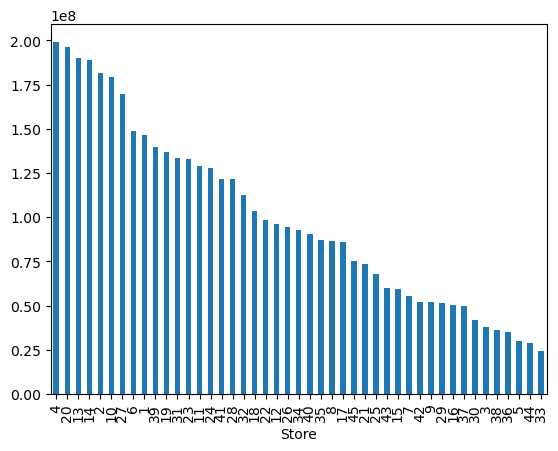

In [89]:
walmart_thursday.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending = False).plot(kind = "bar")

#### Store 4 followed by store 20 had the highest sales on Thursday among all Walmart stores with 199 million US dollars and 196 million US dollars respectively 

#### Store 33 had the least sales on Thursday with 24.5 million US dollars

### 28. Which store performed really well and performed least during the month of April when the sales was at its peak ?

In [90]:
walmart_april = walmart[walmart["month"] == "April"]
walmart_april

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,week
10,1,2010-04-16,1466058.28,0,66.32,2.808,210.488700,7.808,Thursday,April,2010,15
11,1,2010-04-23,1391256.12,0,64.84,2.795,210.439123,7.808,Thursday,April,2010,16
12,1,2010-04-30,1425100.71,0,67.41,2.780,210.389546,7.808,Thursday,April,2010,17
17,1,2010-04-06,1615524.71,0,80.69,2.705,211.176428,7.808,Monday,April,2010,14
52,1,2011-04-02,1606629.58,0,42.27,2.989,212.566881,7.742,Friday,April,2011,13
...,...,...,...,...,...,...,...,...,...,...,...,...
6383,45,2011-04-11,833429.22,0,43.92,3.551,187.970363,8.523,Sunday,April,2011,15
6406,45,2012-04-13,781970.60,0,51.83,4.044,190.759596,8.567,Thursday,April,2012,15
6407,45,2012-04-20,776661.74,0,63.13,4.027,190.813801,8.567,Thursday,April,2012,16
6408,45,2012-04-27,711571.88,0,53.20,4.004,190.868006,8.567,Thursday,April,2012,17


In [91]:
walmart_april.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending = False)

Store
20    28998888.90
14    28601074.56
4     28448548.78
13    27267321.24
2     26432257.45
10    26154802.55
27    24308232.52
1     21713919.82
6     21596335.90
39    19787112.91
19    19640358.21
31    19319556.90
11    18976602.13
28    18960868.94
23    18265836.51
24    18128114.13
41    17032967.11
32    15799392.31
18    14923149.60
12    14308591.27
22    14048332.15
34    13373867.70
26    12871816.32
40    12799741.06
8     12597656.58
17    12526735.98
35    12351421.04
45    10879534.13
21    10310802.26
25     9632291.97
43     8957203.18
15     8315747.71
42     7786792.27
9      7604927.85
29     7412841.69
37     7383647.36
7      6575952.13
30     6290286.62
16     6068480.55
3      5603889.04
38     5450815.40
36     5394744.17
5      4555809.34
44     4151037.69
33     3715583.69
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Store'>

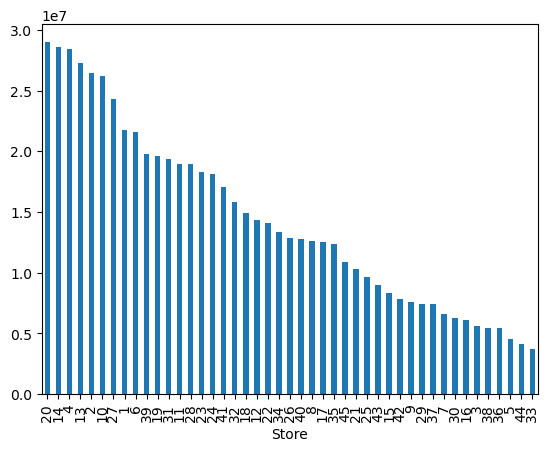

In [92]:
walmart_april.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending = False).plot(kind = "bar")

#### Store 20 performed well in sales during the month of April among the walmart stores when the sales was at its peak at 28.9 million US dollars. Store 14 and Store 4 are in the top contention among the sales in the next places after Store 20. 

#### Store 33 performed the least at 3.7 million US dollars among all the stores sales performance in the month of April

### 29. Which store performed well and performed least during the 41st week when the sales was at its peak? 

In [93]:
walmart_41stweek = walmart[walmart["week"]==41]
walmart_41stweek

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,week
36,1,2010-10-15,1459409.10,0,67.18,2.720,211.813744,7.838,Thursday,October,2010,41
44,1,2010-10-12,1682614.26,0,46.33,2.843,211.465953,7.838,Monday,October,2010,41
88,1,2011-10-14,1493525.93,0,71.74,3.274,217.355273,7.866,Thursday,October,2011,41
131,1,2012-10-08,1592409.97,0,85.05,3.494,221.958433,6.908,Sunday,October,2012,41
179,2,2010-10-15,1794355.49,0,65.80,2.720,211.471329,8.163,Thursday,October,2010,41
...,...,...,...,...,...,...,...,...,...,...,...,...
6280,44,2012-10-08,333594.81,0,81.69,3.509,130.756161,5.407,Sunday,October,2012,41
6328,45,2010-10-15,715263.30,0,58.61,2.868,182.810620,8.724,Thursday,October,2010,41
6336,45,2010-10-12,1002364.34,0,30.54,3.109,182.551954,8.724,Monday,October,2010,41
6380,45,2011-10-14,720946.99,0,63.82,3.541,187.691748,8.523,Thursday,October,2011,41


In [94]:
walmart_41stweek.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending=False)

Store
20    8.825401e+06
4     8.437766e+06
13    8.283578e+06
14    8.072123e+06
2     7.783684e+06
10    7.700830e+06
27    7.271312e+06
1     6.227959e+06
6     6.154220e+06
19    5.896202e+06
39    5.895896e+06
24    5.724189e+06
23    5.686266e+06
31    5.506350e+06
11    5.414883e+06
41    5.320498e+06
28    5.114326e+06
32    4.876905e+06
18    4.366625e+06
22    4.239754e+06
26    4.196932e+06
40    3.973757e+06
12    3.896644e+06
34    3.891677e+06
8     3.689543e+06
35    3.568185e+06
17    3.533890e+06
45    3.171612e+06
21    3.008955e+06
25    2.938236e+06
15    2.552060e+06
43    2.533075e+06
42    2.334612e+06
7     2.240986e+06
29    2.191251e+06
9     2.141121e+06
16    2.074551e+06
37    2.024734e+06
30    1.724166e+06
3     1.573321e+06
38    1.530829e+06
36    1.498878e+06
5     1.226370e+06
44    1.173588e+06
33    1.075024e+06
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Store'>

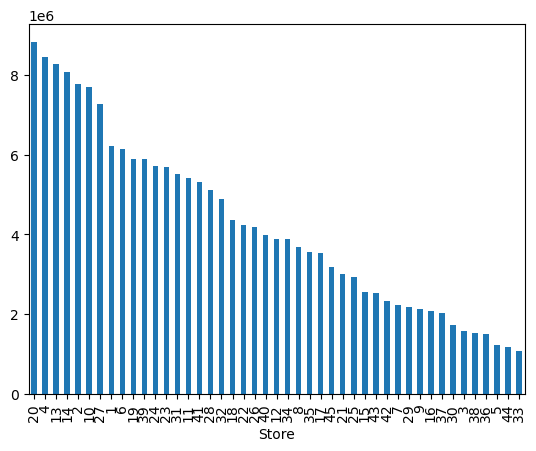

In [95]:
walmart_41stweek.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending=False).plot(kind = "bar")

#### Store 20 had the highest sales among stores in the 41st week among all stores at 8.8 million US dollars

#### Store 4, Store 13, and Store 14 are the next spots in sales during that same week 

#### Store 33 had the lowest sales among stores in the 41st week at 1.75 million US dollars

### 30. What is the general trend of numerical variables in Walmart stores dataset? 

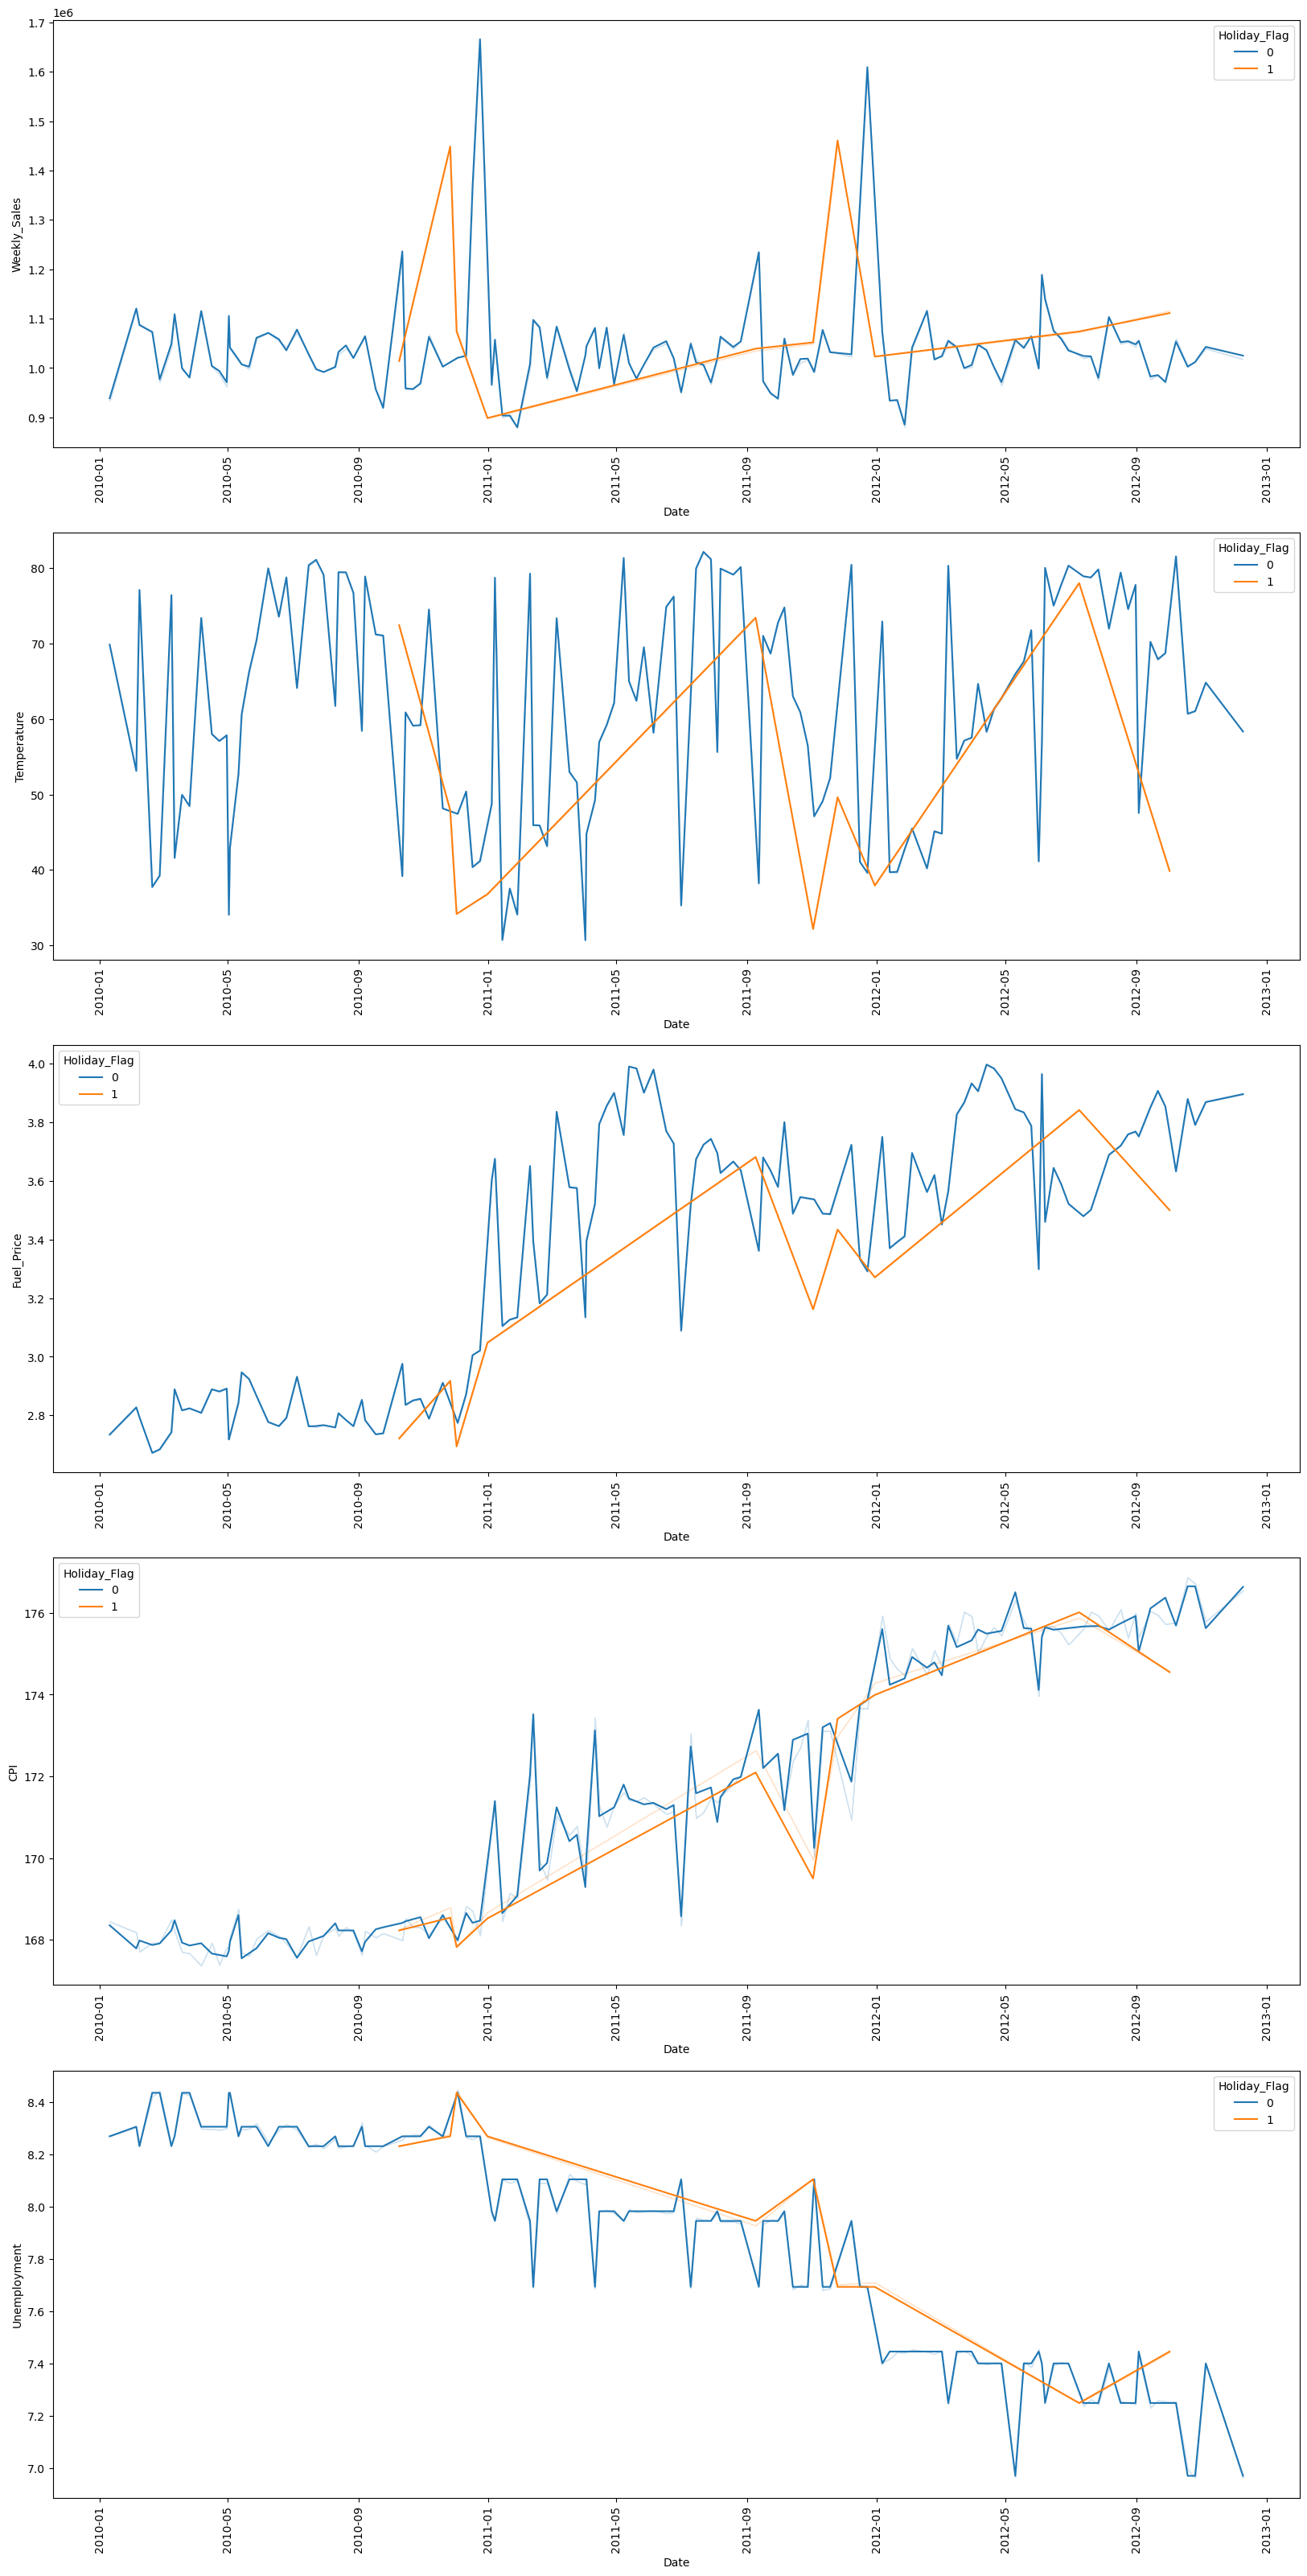

In [96]:
pno = 1
plt.figure(figsize=(20,40))
for i in ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]:
        if pno<=5:
            plt.subplot(5,1,pno)
            ax = sns.lineplot(data = walmart , x = "Date" ,y = i  , hue = walmart.Holiday_Flag , ci = False );
            plt.xticks(rotation = 90)
            pno+=1

#### Some findings from the line plot 

- There has been an upward rise in the trend of CPI and fuel price 
- There is a seasonality in tempeature and it's flow remains cyclical 
- Similarly, the store sales is rising and falling and there is a small upward rise in its trend for the time being
- The trend of unemployment is falling as this was the time the 2008 subprime crisis in the US started to slowly settle down and some people who lost jobs got them back. But not all of them got their jobs back as per various economists and their observation. 
- There has been a jobless growth that is reflected in the steady rise in CPI and fuel price that fell in the midway of 2012

## Conclusions from the Exploratory data analysis (EDA)


1. As Thursday is the highest in terms of day-based sales, Thursday is the best day in the week for providing added discounts and promotions

2. With April topping in sales of all stores, April is the best month for providing any discounts or coupons. Not just during April, during May, July, September, October, and December, Walmart needs to stock items as there might be a rise in demand during these times.  

3. 41st week that is first and second week of October is the best time for any weekly discounts offered to customers. Also, walmart needs to stock more during this time as it is the start of Holiday season sales like Single's day. 

4. 2011 had the highest sales among all the three years

5. As most sales occur during the non-holiday weeks, Walmart must keep its stock reserved for these times than the holiday week



#### The 17th, 41st, 19th, 37th, 28th, 1st and 15th - All these weeks had the highest number of transactions (190)

#### All these weeks had the lowest number of transactions (90)

- 4th week     
- 22nd week   
- 31st week     
- 26th week  
- 9th week      
- 6th week      
- 39th week      
- 2nd week      
- 46th week      
- 52th week      
- 51st week      
- 47th week      
- 49th week    
- 18th week      
- 35th week      
- 27th week      
- 48th week      
- 14th week     
- 45th week 

### So, Walmart needs to stock its items more before the weeks when it performs the best and lesser when it performs the least

## Top 15 Walmart Stores that perform best on a weekly, monthly, daily, and yearly basis 

1. Store 20
2. Store 4
3. Store 13
4. Store 14
5. Store 2
6. Store 10
7. Store 27
8. Store 1
9. Store 6
10. Store 19
11. Store 39
12. Store 31
13. Store 23
14. Store 24
15. Store 11

#### Ensure that these best performing stores doesn't run out of stock as they consistently perform on a yearly, weekly, monthly and daily basis. 

## Top 15 Walmart stores that performs least on a weekly, monthly, daily and yearly basis 

1. Store 33
2. Store 44
3. Store 5
4. Store 36
5. Store 38
6. Store 3
7. Store 30
8. Store 37
9. Store 16
10. Store 9
11. Store 29
12. Store 42
13. Store 7
14. Store 43
15. Store 15

#### These stores didn't get enough public attention or footfall traffic for transactions 

#### So, it is better to minimize the stocks in these stores and focus on getting more transactions in this area and then maximize the stock keeping units (SKU) accordingly

#### Trying omnichannel sales can be another way or Walmart can change these regions into cloud stores like how it did during COVID-19 pandemic

#### Integrating some of these stores in the region where customers from two different areas can travel and get back to their homes quickly. So, they can utilize network optimization to place their shops near densely populated customer regions. 



## Step 4: Feature Engineering 

In [97]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,May,2010,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,December,2010,48
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,February,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,February,2010,8
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,May,2010,18


In [98]:
df = walmart.copy()

In [99]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,May,2010,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,December,2010,48
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,February,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,February,2010,8
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,May,2010,18


In [100]:
df.drop(df.columns[[1,8,9,10,11]], axis =1, inplace = True)

In [101]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [102]:
## Let's do a one-hot encoding for the store ahd holiday_flag 

In [103]:
df_dummies = pd.get_dummies(df,columns=['Store','Holiday_Flag'], drop_first = True)
print(df_dummies.columns.to_list())

['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_18', 'Store_19', 'Store_20', 'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25', 'Store_26', 'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31', 'Store_32', 'Store_33', 'Store_34', 'Store_35', 'Store_36', 'Store_37', 'Store_38', 'Store_39', 'Store_40', 'Store_41', 'Store_42', 'Store_43', 'Store_44', 'Store_45', 'Holiday_Flag_1']


In [104]:
## Scaling the data

x = df_dummies.drop(['Weekly_Sales'],axis=1)
y = df_dummies.Weekly_Sales


In [105]:
x

,Temperature,Fuel_Price,CPI,Unemployment,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,...,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Holiday_Flag_1
0,42.31,2.572,211.096358,8.106,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38.51,2.548,211.242170,8.106,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,39.93,2.514,211.289143,8.106,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,46.63,2.561,211.319643,8.106,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,46.50,2.625,211.350143,8.106,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,64.88,3.997,192.013558,8.684,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6431,64.89,3.985,192.170412,8.667,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6432,54.47,4.000,192.327265,8.667,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6433,56.47,3.969,192.330854,8.667,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [106]:
y

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64

In [107]:
#importing Standard Scaler

from sklearn.preprocessing import StandardScaler  

In [108]:
## Splitting the data into training and testing sets 

from sklearn.model_selection import train_test_split


In [109]:
x_train,x_test,y_train,y_test = train_test_split(x,y , test_size=0.30 , random_state = 123)

In [110]:
st = StandardScaler()

In [111]:
x_train_scaled = st.fit_transform(x_train)

In [112]:
x_train_scaled

array([[ 0.04934613, -1.23105994,  1.08682047, ..., -0.15895745,
        -0.15068719, -0.27234397],
       [-1.61087422,  0.14170881,  1.05175872, ..., -0.15895745,
        -0.15068719, -0.27234397],
       [-0.21817246,  1.49039389, -1.02560551, ..., -0.15895745,
        -0.15068719, -0.27234397],
       ...,
       [ 0.11729585,  0.78539941, -1.08361136, ..., -0.15895745,
        -0.15068719, -0.27234397],
       [ 0.7973281 , -1.23543879,  0.84297693, ..., -0.15895745,
        -0.15068719, -0.27234397],
       [-1.34175052, -1.15224068, -1.0010233 , ..., -0.15895745,
        -0.15068719, -0.27234397]])

In [113]:
x_test_scaled = st.transform(x_test)

In [114]:
x_test_scaled 

array([[-0.2748864 ,  1.77939784, -0.84689071, ..., -0.15895745,
        -0.15068719, -0.27234397],
       [ 0.6619637 , -0.95081369, -0.98151818, ..., -0.15895745,
        -0.15068719, -0.27234397],
       [-1.01965814, -0.02468741, -1.08911961, ...,  6.2909917 ,
        -0.15068719, -0.27234397],
       ...,
       [ 1.44044279,  0.36503004,  1.20494264, ..., -0.15895745,
        -0.15068719, -0.27234397],
       [-1.49263101, -0.98146562, -0.90939106, ..., -0.15895745,
        -0.15068719, -0.27234397],
       [ 1.50143702,  0.81605135,  1.29348108, ..., -0.15895745,
        -0.15068719,  3.67182722]])

In [115]:
x_train

,Temperature,Fuel_Price,CPI,Unemployment,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,...,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Holiday_Flag_1
1155,61.26,2.795,213.949614,6.3840,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3532,30.23,3.422,212.571112,6.9610,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3972,56.26,4.038,130.896645,11.2185,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
283,60.97,3.601,223.015426,6.1700,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6233,67.54,3.641,129.430600,6.5600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,82.41,3.648,213.791715,8.3000,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4060,33.52,3.437,133.614143,10.2560,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1346,62.53,3.716,128.616064,8.7440,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3454,75.24,2.793,204.362566,7.5270,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
y_train

1155     488683.57
3532     636419.12
3972    1216059.41
283     1900745.13
6233     303974.28
           ...    
5218     509647.25
4060     536031.67
1346    1815798.85
3454     719591.13
3582     893613.00
Name: Weekly_Sales, Length: 4504, dtype: float64

In [117]:
x_test

,Temperature,Fuel_Price,CPI,Unemployment,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,...,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Holiday_Flag_1
2689,55.20,4.170,137.923067,8.150,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2601,72.71,2.923,132.630000,8.099,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6206,41.28,3.346,128.399500,7.224,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5926,75.93,3.917,128.955300,8.494,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5863,54.34,2.962,126.442065,9.765,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,50.04,3.953,190.610746,8.424,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2183,35.76,2.748,190.951728,6.986,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1074,87.26,3.524,218.593751,6.425,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3720,32.44,2.909,135.465778,8.237,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
y_test

2689    1255087.26
2601    1418027.08
6206     284496.14
5926     534597.69
5863     543384.01
           ...    
1971    1905033.01
2183     495022.51
1074     883683.35
3720    1945070.33
4282     433565.77
Name: Weekly_Sales, Length: 1931, dtype: float64

In [119]:
print(x_train.shape, y_train.shape)

print(x_test.shape, y_test.shape)

(4504, 49) (4504,)
(1931, 49) (1931,)


## Step 5: Model Building and Evaluation

### Linear Regression

In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
LR = LinearRegression()
LR.fit(x_train_scaled,y_train)

LinearRegression()

In [122]:
print(LR.intercept_)

1042678.655652198


In [123]:
print(LR.coef_)

[ -10897.21511963  -17126.82651429  140038.59072676  -31367.53391703
   53357.32502627 -167650.13472159  120213.35317133 -181031.67556812
    1066.97061887 -135897.25087193  -98458.66091356 -161490.87335383
   97930.89758763  -31256.22322856  -21736.85839418  108366.25443587
   88777.06532926  -88054.46225359 -149964.32327983  -57619.41461354
  -22866.91368454   30924.72574028   79612.64727854 -113753.01236023
  -34623.01273926   11316.73900677   17138.47760305 -125009.89264232
  -41739.76362371   69323.46606715   26937.24391263  -98085.35998723
 -160774.59239873  -22948.55263803  -44677.48385278 -141729.39463917
  -32613.92030212  -50044.96870257 -162962.77376885 -151229.47364423
 -113234.99773262  -15295.7838849   -52673.85422467  -32801.64899304
  -98741.82741521 -119878.30872805 -149001.27499384  -94742.71140179
   16180.68031051]


In [124]:
coeff_df = pd.DataFrame(LR.coef_, x.columns,  columns = ["Coefficient"])

In [125]:
coeff_df

,Coefficient
Temperature,-10897.215120
Fuel_Price,-17126.826514
CPI,140038.590727
Unemployment,-31367.533917
Store_2,53357.325026
Store_3,-167650.134722
Store_4,120213.353171
Store_5,-181031.675568
Store_6,1066.970619
Store_7,-135897.250872


In [126]:
## Predicting the test set 

yy_pred = LR.predict(x_test_scaled)

In [127]:
## Predicting the train set 

yy_pred_train = LR.predict(x_train_scaled)

In [128]:
from sklearn import metrics

from sklearn.metrics import r2_score

In [129]:
## R2 score for test 

r2_score(y_test , yy_pred)

0.9304859653121611

In [130]:
## Evaluation metrics for test predictions

print("MAE: ", metrics.mean_absolute_error(y_test, yy_pred))
print("MSE: ",metrics.mean_squared_error(y_test, yy_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, yy_pred)))

MAE:  89696.5601477873
MSE:  21814046532.09171
RMSE:  147695.79050227432


In [131]:
y_test.describe()

count    1.931000e+03
mean     1.050512e+06
std      5.603306e+05
min      2.099862e+05
25%      5.579893e+05
50%      9.693875e+05
75%      1.425581e+06
max      2.720371e+06
Name: Weekly_Sales, dtype: float64

In [132]:
### R2 score for train

r2_train = r2_score(y_train, yy_pred_train) 

print(r2_train)

0.9314861747609847


In [133]:
## Evaluation metrics for training set predictions 

print("MAE: ", metrics.mean_absolute_error(y_train, yy_pred_train))
print("MSE: ",metrics.mean_squared_error(y_train, yy_pred_train))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, yy_pred_train)))

MAE:  88789.32063015083
MSE:  21178123350.532562
RMSE:  145527.05367227277


<Axes: xlabel='Weekly_Sales', ylabel='Density'>

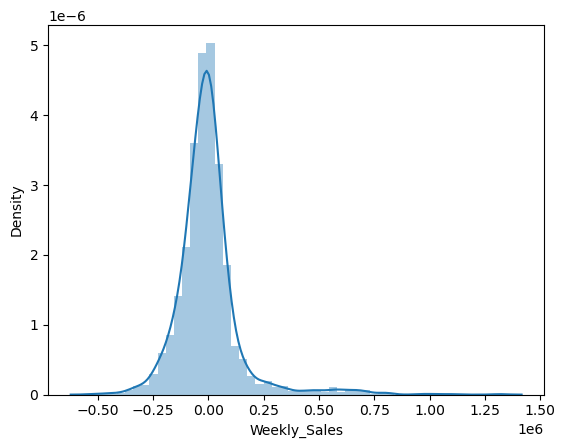

In [134]:
## Plotting the residuals to check its normality 

sns.distplot(y_test - yy_pred)

In [135]:
## Let's check for some multicollinearity 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(x_train_scaled.shape[1]):
    vif.append(variance_inflation_factor(x_train_scaled, i))

In [136]:
vif

[1.5072305455624373,
 2.6585551985909524,
 454.938516456174,
 15.178384116195202,
 1.8657565492422807,
 1.902049039224039,
 56.92650386655368,
 2.0486603101884353,
 1.917690744215851,
 4.879745710651518,
 2.0697692199410396,
 2.2197826430390544,
 48.75378147478335,
 1.915376671451076,
 48.63262499482232,
 53.99217841429962,
 7.420964733078585,
 39.67449247768149,
 6.548723202145204,
 55.352518394146045,
 41.001968984575974,
 41.03783516882197,
 2.2866705375012897,
 1.8670356972473803,
 38.895964272044935,
 53.637263481954484,
 43.740547709771974,
 2.4538460521624743,
 48.230557497553654,
 35.73305825782872,
 44.8115522231174,
 39.10396533414616,
 1.8571189361039666,
 1.8760851718575997,
 4.693094328809418,
 51.82457098320749,
 43.388518613094575,
 41.17053614923814,
 1.816889342794835,
 1.910984901939373,
 44.76852807756473,
 1.9701546160558248,
 52.112354327693495,
 5.366899827760606,
 52.176496240932515,
 2.407286919000811,
 59.038932592056184,
 7.145696600958851,
 1.0467892864230313

In [137]:
pd.DataFrame({'vif':vif}, index = x.columns).T

,Temperature,Fuel_Price,CPI,Unemployment,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,...,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Holiday_Flag_1
vif,1.507231,2.658555,454.938516,15.178384,1.865757,1.902049,56.926504,2.04866,1.917691,4.879746,...,1.910985,44.768528,1.970155,52.112354,5.3669,52.176496,2.407287,59.038933,7.145697,1.046789


<Axes: >

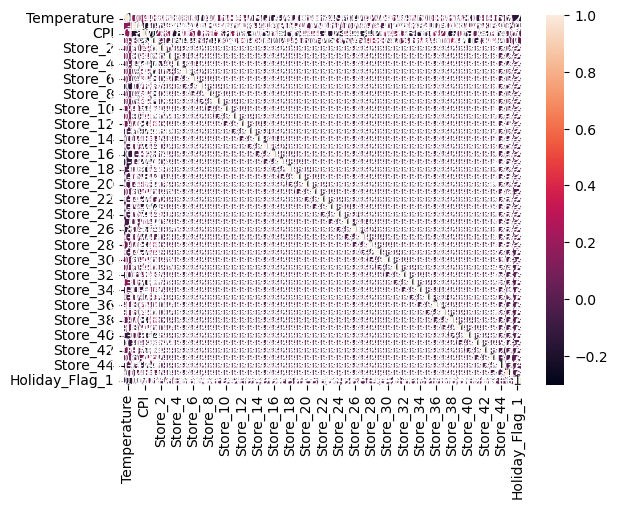

In [138]:
sns.heatmap(x.corr(), annot=True)

Feature: 0, Score: -10897.21512
Feature: 1, Score: -17126.82651
Feature: 2, Score: 140038.59073
Feature: 3, Score: -31367.53392
Feature: 4, Score: 53357.32503
Feature: 5, Score: -167650.13472
Feature: 6, Score: 120213.35317
Feature: 7, Score: -181031.67557
Feature: 8, Score: 1066.97062
Feature: 9, Score: -135897.25087
Feature: 10, Score: -98458.66091
Feature: 11, Score: -161490.87335
Feature: 12, Score: 97930.89759
Feature: 13, Score: -31256.22323
Feature: 14, Score: -21736.85839
Feature: 15, Score: 108366.25444
Feature: 16, Score: 88777.06533
Feature: 17, Score: -88054.46225
Feature: 18, Score: -149964.32328
Feature: 19, Score: -57619.41461
Feature: 20, Score: -22866.91368
Feature: 21, Score: 30924.72574
Feature: 22, Score: 79612.64728
Feature: 23, Score: -113753.01236
Feature: 24, Score: -34623.01274
Feature: 25, Score: 11316.73901
Feature: 26, Score: 17138.47760
Feature: 27, Score: -125009.89264
Feature: 28, Score: -41739.76362
Feature: 29, Score: 69323.46607
Feature: 30, Score: 269

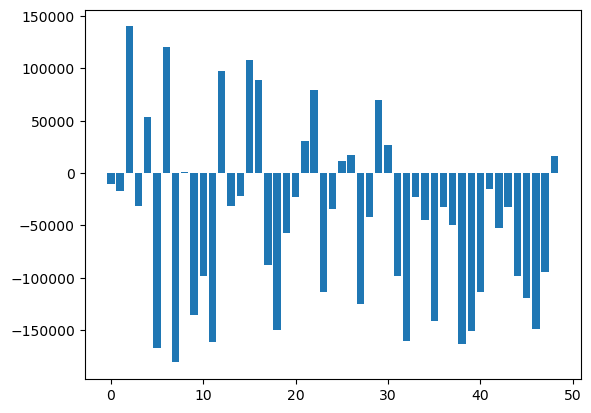

In [139]:
# get feature importance
importance = LR.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

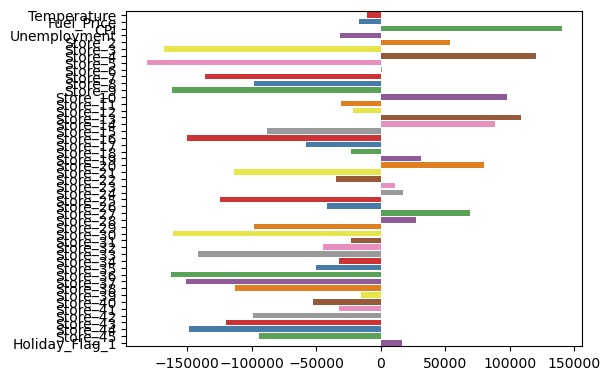

In [140]:
# Let us use the barplot to find the top variables that impact sales for walmart in Linear regression model 

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = x.columns, x= LR.coef_, palette='Set1')
plt.show()